### Updated Sample: 99,999 Objects
- Chosen from the DR11 test brick region (ignoring the core of Coma). Galaxies span ~0.6-3 arcmin.
- Every galaxy name should be unique -- based on "central" coordinates of galaxy with a resolution of 3.6"

#### Columns:
- _INIT --> initial ellipse parameters (BX, BY are in pixels)
    - BA_INIT
    - PA_INIT
    - SMA_INIT
    - BX_INIT
    - BY_INIT
    - RA_INIT
    - DEC_INIT
- GROUP -->
    - GROUP_ID --> ID of group
    - GROUP_NAME --> name of group
    - GROUP_MULT --> number of objects in group
    - GROUP_PRIMARY --> object with the largest initial diameter
    - GROUP_RA --> RA of group center
    - GROUP_DEC --> DEC of group center
    - GROUP_DIAMETER --> Size of group (Mpc?)
- RA, DEC, BX, BY --> the 'final' values for the galaxy
- _MOMENT -->
    - SMA_MOMENT --> SMA of galaxy ellipse
    - BA_MOMENT --> BA (axis ratio) of galaxy ellipse
    - PA_MOMENT --> PA (position angle) of galaxy ellipse
- COG_MTOT_ --> total magnitude in [FUV NUV], [GRIZ], [W1-4]
- COG_MTOT_ERR_ --> errors for the above columns; now fixed.
- SMA50_ --> half-light SMA length in each bandpass based on the fit to the curve of growth
- FLUX_AP00, FLUX_P01, FLUX_AP02, FLUX_AP03, FLUX_AP04 --> flux measurements within each aperture (which is some multiple of SMA_MOMENT -- 0.5, 1.0, 1.25, 1.5, 2.0)

 ### Load modules and packages and libraries and tables and...

In [1]:
import numpy as np
from rich import print
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.table import Table, Column
import pandas as pd
import seaborn as sns
from astropy.coordinates import SkyCoord
from astropy import units as u
from matplotlib import colors

import os
homedir=os.getenv("HOME")

In [2]:
#read in the .fits file. first is ellipse fitting, second is SExtractor.
ellipse_tab=Table.read(homedir+'/Desktop/wisesize/SGA2025_tables/SGA2025-ellipse-v0.3.fits',hdu=1)
tractor_tab=Table.read(homedir+'/Desktop/wisesize/SGA2025_tables/SGA2025-ellipse-v0.3.fits',hdu=2)
sga2020 = Table.read(homedir+'/Desktop/wisesize/SGA2025_tables/sga2020.csv')

### QA One
#### Separations between $\theta_{INIT}$, $\theta_{FINAL}$, and $\theta_{TRACTOR}$

#### Number of galaxies with no Tractor RA, DEC: 264

In [4]:
#ellipse_tab.columns --> RA_INIT, DEC_INIT, RA, DEC, RA_TRACTOR, DEC_TRACTOR

In [76]:
radec_init = ellipse_tab['RA_INIT'], ellipse_tab['DEC_INIT']
radec_final = ellipse_tab['RA'], ellipse_tab['DEC']
radec_tractor = ellipse_tab['RA_TRACTOR'], ellipse_tab['DEC_TRACTOR']

zero_flag = (radec_tractor[0]!=0) & (radec_tractor[1]!=0)

# Use your existing 'flag' to select objects
ra_init, dec_init = radec_init[0][zero_flag], radec_init[1][zero_flag]
ra_final, dec_final = radec_final[0][zero_flag], radec_final[1][zero_flag]
ra_tractor, dec_tractor = radec_tractor[0][zero_flag], radec_tractor[1][zero_flag]

#small-angle approximation for angular separation in degrees...good enough for our small region of space
delta_theta_init_final   = np.sqrt(( (ra_init - ra_final)*np.cos(np.deg2rad(dec_final)) )**2 + \
                                   (dec_init - dec_final)**2)
delta_theta_init_tractor = np.sqrt(( (ra_init - ra_tractor)*np.cos(np.deg2rad(dec_tractor)) )**2 +\
                                   (dec_init - dec_tractor)**2)
delta_theta_tractor_final= np.sqrt(( (ra_tractor - ra_final)*np.cos(np.deg2rad(dec_final)) )**2 +\
                                   (dec_tractor - dec_final)**2)

In [80]:
import warnings
warnings.filterwarnings("ignore")

df = pd.DataFrame({r'$\theta$_INIT - $\theta$_FINAL': delta_theta_init_final,
                r'$\theta$_INIT - $\theta$_TRACTOR': delta_theta_init_tractor,
                r'$\theta$_TRACTOR - $\theta$_FINAL': delta_theta_tractor_final})

#convert to arcseconds
df_arcsec = df * 3600

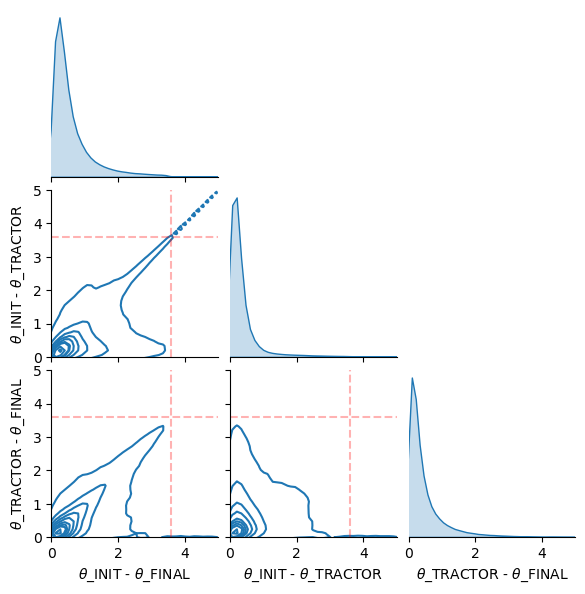

In [61]:
p = sns.pairplot(df_arcsec, corner=True, height=2, kind='kde', diag_kind='kde')

axes_flatten = [ax for ax in p.axes.flat if ax is not None]

for i, ax in enumerate(axes_flatten):
    if i not in [0, 2, 5]:
        ax.axhline(3.6, color='red', ls='--', alpha=0.3)
        ax.axvline(3.6, color='red', ls='--', alpha=0.3)

    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
        
plt.show()

#### Outliers

In [89]:
for column in df.columns:
    sep_flag=(df_arcsec[column]>3.6)  #3.6 arcsec
    sep_flag2=(df_arcsec[column]>10.0) #5.0 arcsec
    if np.sum(sep_flag)>0:
        sganame=ellipse_tab['SGAID'][zero_flag]
        sganame1=sganame[sep_flag]
        sganame2=sganame[sep_flag2]
        print(f'# Galaxies with separation > 3.6" for {column}: {len(sganame1)}')
        print(f'Galaxies with separation > 5": {np.asarray(sganame2)}')
        print()

# Galaxies with separation > 3.6" for $\theta$_INIT - $\theta$_FINAL: 1038

Galaxies with separation > 5": [   1024    1080    1265    1486    2300    2673    2901    8953    8970
    9034   11949   12228   33209   35478   43538   48334   51027   51249
   62666   72133   78420   83940   87788   92702   97672  116612  120302
  125884  127101  131797  135033  143140  146972  149963  153168  156333
  169514  180295  183821  188869  192073  200999  213883  233090  235625
  240525  254462  257382  273828  281469  286571  307918  309057  313274
  318531  318967  320946  321326  354075  355228  356684  363769  364212
  364796  372261  373270  381072  383586  388119  388929  401727  411581
  423290  461811  469147  483164  505447  584679  590960  592524  916329
  938695 1267411 1282529 1334249 1334306 3140969 3141784 3142350 3144296
 3144351 3144583 3145412 3145687 3147525 3150760 3154316 3155608 3169352
 3169449 3171356 3178720 3197766 3349244 3633252 3687798 3689016 4197693
 4257753 4517102 4525507 4694238 4722067 4744398 4760795 4783533 4815735
 4906401 4909976 4927661 4929921 4932054 4981784 4995718 4997130 5006254
 5021788 5053942 5054286]

# Galaxies with separation > 3.6" for $\theta$_INIT - $\theta$_TRACTOR: 2062

Galaxies with separation > 5": [   1024    1080    1154    1265    1486    2300    2673    2742    2901
    8953    8970    9034    9080   11949   12228   33209   35478   43538
   48334   51027   51249   62666   72133   78420   83053   83940   87788
   92702   96654   97672  116612  120302  125884  127101  131797  135033
  143140  146972  149963  153168  156333  159624  159865  169514  180295
  183821  188869  192073  200999  213883  218091  233090  235625  240525
  254462  257382  269246  273828  280235  281469  286571  298955  300134
  306098  307918  309057  313274  318531  318967  320946  321326  325860
  333799  354075  355228  355737  356684  363769  364212  364796  372261
  373270  381072  383586  388119  388929  401727  411581  413296  423290
  461811  469147  483164  505447  584679  590960  590982  592524  916329
  925021  938695 1267411 1282529 1334249 1334306 3136243 3140969 3141784
 3142036 3142350 3144019 3144296 3144351 3144583 3144951 3145412 3145687
 3145940 3145943 3147448 3147525 3150076 3150760 3151176 3154316 3155608
 3169352 3169449 3171356 3178720 3197766 3349244 3616132 3633252 3687798
 3689016 3790854 4136122 4197693 4257753 4368867 4517102 4525507 4688085
 4693489 4694238 4695456 4697624 4711058 4715680 4722067 4739331 4739900
 4742881 4743016 4744398 4746024 4747148 4757471 4757584 4760795 4783533
 4784304 4791157 4810108 4811364 4815735 4831236 4840590 4853659 4853720
 4853861 4854657 4854854 4856588 4860533 4863130 4872838 4879133 4879375
 4880070 4885725 4886139 4886733 4906401 4909976 4910217 4923388 4923761
 4924235 4925062 4927661 4927816 4929921 4931342 4932054 4933549 4950409
 4955633 4956190 4971445 4973665 4976564 4981784 4995718 4997130 4998700
 5000525 5000554 5006254 5020025 5021788 5022464 5028000 5045524 5053942
 5053996 5054055 5054286 5054651 5056445]

# Galaxies with separation > 3.6" for $\theta$_TRACTOR - $\theta$_FINAL: 840

Galaxies with separation > 5": [   1154    2742   48514   96654  159624  298955  300134  306098  325860
  333799  355737  925021 3136243 3142036 3143977 3144019 3144951 3145940
 3145943 3147440 3150076 3177795 3349248 3614027 3616132 3790854 4136122
 4368867 4695456 4697624 4711058 4715680 4739900 4742881 4743862 4746024
 4757471 4757584 4784304 4810108 4811364 4828284 4831236 4840590 4853659
 4853720 4853861 4854657 4856588 4863130 4872838 4879133 4879375 4880070
 4885725 4886139 4910217 4923388 4923761 4924235 4927816 4931342 4933549
 4955633 4956190 4971445 4976564 4994592 4997325 4998087 4998700 5020025
 5022464 5028000 5050276 5053545 5053863 5053996 5054651 5056445]

### QA Two
#### Separations between BAPA_INIT and BAPA_FINAL

In [189]:
#ellipses are only unique up to 180 degrees...0<PA<180
bapa_init = ellipse_tab['BA_INIT'], ellipse_tab['PA_INIT']
bapa_final = ellipse_tab['BA'], ellipse_tab['PA']

diff_ba = bapa_init[0]-bapa_final[0]
relative_diff_ba = diff_ba/bapa_init[0]

#for PA, compare cos(2*difference)
#if they are nearly 90 degrees separated, then |np.cos(2*difference)| will be ~1
diff_pa = np.cos(2*(bapa_init[1]-bapa_final[1]))

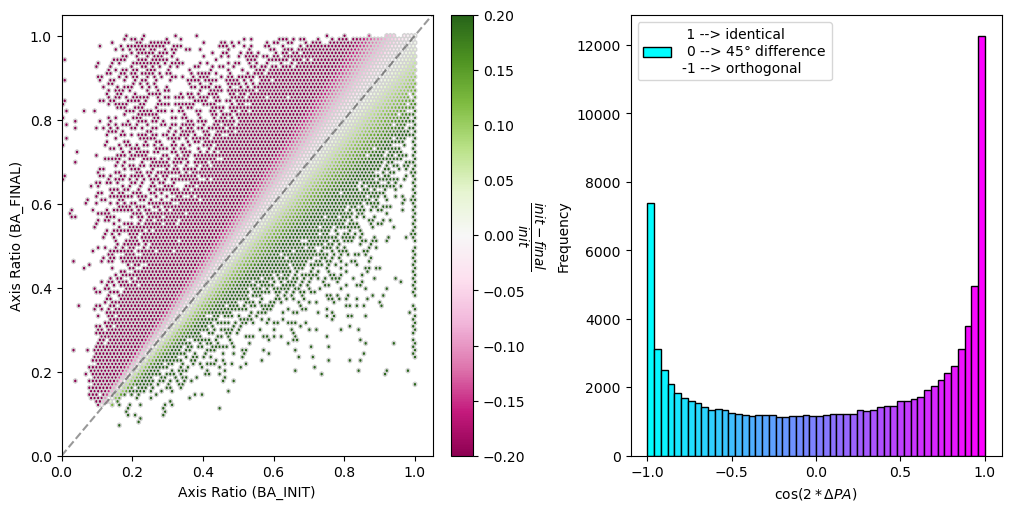

In [207]:
###
#AXIS RATIO
###
fig, axs = plt.subplots(1, 2, figsize=(10, 5),layout='constrained')

im1 = axs[0].hexbin(bapa_init[0], bapa_final[0], C=relative_diff_ba,
                    cmap='PiYG', vmin=-0.2, vmax=0.2, edgecolor='lightgray')
axs[0].axline([0,0],slope=1,color='black',ls='--',alpha=0.4)
axs[0].set_xlabel('Axis Ratio (BA_INIT)')
axs[0].set_ylabel('Axis Ratio (BA_FINAL)')
axs[0].set_xlim(0,)
axs[0].set_ylim(0,)

cbar = fig.colorbar(im1, ax=axs[0])
cbar.set_label(r'$\frac{init-final}{init}$',fontsize=14,rotation=270,labelpad=15)


###
#POSITION ANGLE
###

#from matplotlib histogram documentation
N, bins, patches = axs[1].hist(diff_pa, bins=50,
                              edgecolor='black',
                              label=' 1 --> identical\n'
                                    f' 0 --> 45$\degree$ difference\n'
                                    '-1 --> orthogonal')

#normalize to min/max of data range
norm = colors.Normalize(vmin=-1, vmax=1)
cmap = plt.cm.cool

#get bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

#loop over bins, not raw data
for center, patch in zip(bin_centers, patches):
    patch.set_facecolor(cmap(norm(center)))

axs[1].set_xlabel(r'$\cos(2* \Delta PA)$')
axs[1].set_ylabel('Frequency')
axs[1].legend()

plt.show()

#### Outliers

In [218]:
print(f'# galaxies with relative separation > 0.5 for BA: {len(relative_diff_ba[relative_diff_ba>0.5])}')
print(f'# galaxies with cos(2*diff) < 0 for PA: {len(diff_pa[diff_pa<0])}')
print('--------------------------------')

for i in range(len(bapa_init[0])):
    if (np.abs(relative_diff_ba[i])>5) and (bapa_init[0][i]!=0):
        sganame = ellipse_tab['SGAID'][i]
        print(f'Galaxy with relative difference > 5 for BA: {sganame}') 
        print(f'Separation (BA): {diff_ba[i]:.3f}')
        print()

print('--------------------------------')
for i in range(len(diff_pa)):
    if (diff_pa[i]==-1.0):
        sganame = ellipse_tab['SGAID'][i]
        print(f'Galaxy with cos(2*diff) = -1.0 for PA: {sganame}') 
        print(f'Separation (PA): {diff_pa[i]:.3f}')
        print()

# galaxies with relative separation > 0.5 for BA: 201

# galaxies with cos(2*diff) < 0 for PA: 42551

--------------------------------

Galaxy with relative difference > 5 for BA: 8840

Separation (BA): -0.719

Galaxy with relative difference > 5 for BA: 8892

Separation (BA): -0.800

Galaxy with relative difference > 5 for BA: 8912

Separation (BA): -0.614

Galaxy with relative difference > 5 for BA: 9056

Separation (BA): -0.501

Galaxy with relative difference > 5 for BA: 9078

Separation (BA): -0.545

Galaxy with relative difference > 5 for BA: 35184

Separation (BA): -0.775

Galaxy with relative difference > 5 for BA: 41415

Separation (BA): -0.700

Galaxy with relative difference > 5 for BA: 96164

Separation (BA): -0.747

Galaxy with relative difference > 5 for BA: 117281

Separation (BA): -0.572

Galaxy with relative difference > 5 for BA: 126440

Separation (BA): -0.750

Galaxy with relative difference > 5 for BA: 138200

Separation (BA): -0.795

Galaxy with relative difference > 5 for BA: 163890

Separation (BA): -0.785

Galaxy with relative difference > 5 for BA: 184053

Separation (BA): -0.814

Galaxy with relative difference > 5 for BA: 203269

Separation (BA): -0.790

Galaxy with relative difference > 5 for BA: 215507

Separation (BA): -0.713

Galaxy with relative difference > 5 for BA: 239348

Separation (BA): -0.737

Galaxy with relative difference > 5 for BA: 257418

Separation (BA): -0.755

Galaxy with relative difference > 5 for BA: 326206

Separation (BA): -0.749

Galaxy with relative difference > 5 for BA: 329874

Separation (BA): -0.536

Galaxy with relative difference > 5 for BA: 330972

Separation (BA): -0.786

Galaxy with relative difference > 5 for BA: 364212

Separation (BA): -0.714

Galaxy with relative difference > 5 for BA: 376850

Separation (BA): -0.787

Galaxy with relative difference > 5 for BA: 414443

Separation (BA): -0.838

Galaxy with relative difference > 5 for BA: 427649

Separation (BA): -0.821

Galaxy with relative difference > 5 for BA: 435082

Separation (BA): -0.728

Galaxy with relative difference > 5 for BA: 448411

Separation (BA): -0.571

Galaxy with relative difference > 5 for BA: 458524

Separation (BA): -0.575

Galaxy with relative difference > 5 for BA: 461444

Separation (BA): -0.667

Galaxy with relative difference > 5 for BA: 643466

Separation (BA): -0.552

Galaxy with relative difference > 5 for BA: 680194

Separation (BA): -0.680

Galaxy with relative difference > 5 for BA: 890132

Separation (BA): -0.740

Galaxy with relative difference > 5 for BA: 925021

Separation (BA): -0.494

Galaxy with relative difference > 5 for BA: 938695

Separation (BA): -0.551

Galaxy with relative difference > 5 for BA: 1029278

Separation (BA): -0.214

Galaxy with relative difference > 5 for BA: 1036870

Separation (BA): -0.765

Galaxy with relative difference > 5 for BA: 1063314

Separation (BA): -0.381

Galaxy with relative difference > 5 for BA: 1250011

Separation (BA): -0.756

Galaxy with relative difference > 5 for BA: 1267411

Separation (BA): -0.556

Galaxy with relative difference > 5 for BA: 1282614

Separation (BA): -0.554

Galaxy with relative difference > 5 for BA: 1282897

Separation (BA): -0.782

Galaxy with relative difference > 5 for BA: 1282983

Separation (BA): -0.729

Galaxy with relative difference > 5 for BA: 1294825

Separation (BA): -0.557

Galaxy with relative difference > 5 for BA: 1306572

Separation (BA): -0.774

Galaxy with relative difference > 5 for BA: 1315185

Separation (BA): -0.802

Galaxy with relative difference > 5 for BA: 1344303

Separation (BA): -0.570

Galaxy with relative difference > 5 for BA: 1348291

Separation (BA): -0.534

Galaxy with relative difference > 5 for BA: 1352304

Separation (BA): -0.651

Galaxy with relative difference > 5 for BA: 1352511

Separation (BA): -0.675

Galaxy with relative difference > 5 for BA: 1422527

Separation (BA): -0.755

Galaxy with relative difference > 5 for BA: 1446572

Separation (BA): -0.834

Galaxy with relative difference > 5 for BA: 1481868

Separation (BA): -0.881

Galaxy with relative difference > 5 for BA: 1503316

Separation (BA): -0.936

Galaxy with relative difference > 5 for BA: 1560458

Separation (BA): -0.868

Galaxy with relative difference > 5 for BA: 1568681

Separation (BA): -0.801

Galaxy with relative difference > 5 for BA: 1588824

Separation (BA): -0.771

Galaxy with relative difference > 5 for BA: 1647695

Separation (BA): -0.661

Galaxy with relative difference > 5 for BA: 2370976

Separation (BA): -0.744

Galaxy with relative difference > 5 for BA: 2372179

Separation (BA): -0.683

Galaxy with relative difference > 5 for BA: 2412154

Separation (BA): -0.529

Galaxy with relative difference > 5 for BA: 2433954

Separation (BA): -0.431

Galaxy with relative difference > 5 for BA: 2446219

Separation (BA): -0.535

Galaxy with relative difference > 5 for BA: 3151582

Separation (BA): -0.536

Galaxy with relative difference > 5 for BA: 3154390

Separation (BA): -0.837

Galaxy with relative difference > 5 for BA: 3173142

Separation (BA): -0.737

Galaxy with relative difference > 5 for BA: 3177699

Separation (BA): -0.561

Galaxy with relative difference > 5 for BA: 3177809

Separation (BA): -0.688

Galaxy with relative difference > 5 for BA: 4108332

Separation (BA): -0.573

Galaxy with relative difference > 5 for BA: 4165295

Separation (BA): -0.725

Galaxy with relative difference > 5 for BA: 4403635

Separation (BA): -0.782

Galaxy with relative difference > 5 for BA: 4454725

Separation (BA): -0.840

Galaxy with relative difference > 5 for BA: 4559258

Separation (BA): -0.734

Galaxy with relative difference > 5 for BA: 4562389

Separation (BA): -0.304

Galaxy with relative difference > 5 for BA: 4951267

Separation (BA): -0.659

--------------------------------

Galaxy with cos(2*diff) = -1.0 for PA: 447151

Separation (PA): -1.000

Galaxy with cos(2*diff) = -1.0 for PA: 3178178

Separation (PA): -1.000

Galaxy with cos(2*diff) = -1.0 for PA: 3534087

Separation (PA): -1.000

Galaxy with cos(2*diff) = -1.0 for PA: 4711088

Separation (PA): -1.000

Galaxy with cos(2*diff) = -1.0 for PA: 4887746

Separation (PA): -1.000

Galaxy with cos(2*diff) = -1.0 for PA: 4988854

Separation (PA): -1.000

Galaxy with cos(2*diff) = -1.0 for PA: 5020937

Separation (PA): -1.000

Galaxy with cos(2*diff) = -1.0 for PA: 5048147

Separation (PA): -1.000

In [178]:
diff_pa

<Column name='PA_INIT' dtype='float32' length=99999>
 -0.3338252
 0.86566865
 0.97870815
 0.38508576
 0.46856454
 0.36118254
0.009913596
  0.2657313
 0.12872417
  0.9560639
 0.17782447
  0.4941497
        ...
0.061713647
 0.50463295
 -0.9421168
 0.12150539
-0.21603075
  0.9839214
-0.23762336
   0.950783
 0.29812708
  0.8415098
 0.03724633
-0.92738867

### QA Three
#### SMA_INIT vs. SMA_MOMENT

In [12]:
#diam_init = ellipse_tab['DIAM_INIT'] #arcminutes

sma_init = ellipse_tab['SMA_INIT']    #arcseconds
sma_final = ellipse_tab['SMA_MOMENT'] #arcseconds

diff_sma = sma_init-sma_final

relative_diff_sma = diff_sma/sma_init

In [13]:
#finding the median ratio (slope):
scale_median = np.median(sma_final / sma_init)
print(f"Median SMA scale factor: {scale_median:.3f}")

Median SMA scale factor: 0.731

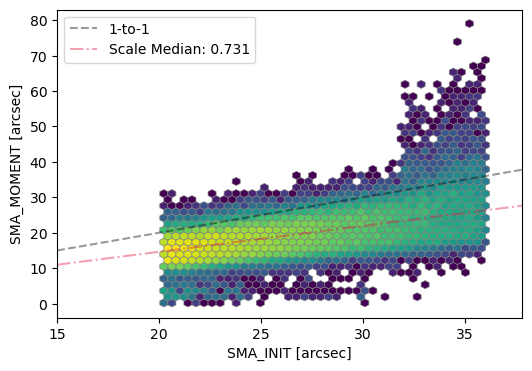

In [221]:
plt.figure(figsize=(6,4))

#mincnt=1 means ignore empty bins
hb = plt.hexbin(sma_init, sma_final, gridsize=40, cmap='viridis', mincnt=1, linewidths=0.5, edgecolors='gray',
               bins='log')

#plt.scatter(sma_init[~ba_flag], sma_final[~ba_flag], color='red', s=5)

plt.xlabel('SMA_INIT [arcsec]')
plt.ylabel('SMA_MOMENT [arcsec]')
plt.axline([0,0],slope=1,color='black',ls='--',alpha=0.4, label='1-to-1')
plt.axline([0,0], slope=scale_median, color='crimson', ls='-.',alpha=0.4,label=f'Scale Median: {scale_median:.3f}')
plt.xlim(15,)
#plt.ylim(0,92)
plt.legend(loc='upper left')
plt.show()

#### Outliers

In [227]:
print(f'[red] N Galaxies with relative separation > 50%: {len(ellipse_tab[np.abs(relative_diff_sma)>0.5])}')

for i in range(len(sma_init)):
    if (np.abs(relative_diff_sma[i])>10):
        sganame = ellipse_tab['SGAID'][i]
        print(f'Galaxy with relative separation > 1000% for SMA: {sganame}')
        print(f'Separation: {diff_sma[i]:.3f}')
        print()

 N Galaxies with relative separation > 50%: 27310

Galaxy with relative separation > 1000% for SMA: 542

Separation: -543.109

Galaxy with relative separation > 1000% for SMA: 1079

Separation: -1030.108

Galaxy with relative separation > 1000% for SMA: 1158

Separation: -1295.791

Galaxy with relative separation > 1000% for SMA: 1994

Separation: -74183.227

Galaxy with relative separation > 1000% for SMA: 2600

Separation: -5302.248

Galaxy with relative separation > 1000% for SMA: 2689

Separation: -609.802

Galaxy with relative separation > 1000% for SMA: 2690

Separation: -170.544

Galaxy with relative separation > 1000% for SMA: 2742

Separation: -989.114

Galaxy with relative separation > 1000% for SMA: 2770

Separation: -475.706

Galaxy with relative separation > 1000% for SMA: 2844

Separation: -331.628

Galaxy with relative separation > 1000% for SMA: 2874

Separation: -802.880

Galaxy with relative separation > 1000% for SMA: 2888

Separation: -292.388

Galaxy with relative separation > 1000% for SMA: 2928

Separation: -327.485

Galaxy with relative separation > 1000% for SMA: 3015

Separation: -388.313

Galaxy with relative separation > 1000% for SMA: 3166

Separation: -202.071

Galaxy with relative separation > 1000% for SMA: 3229

Separation: -5584.847

Galaxy with relative separation > 1000% for SMA: 3313

Separation: -259.018

Galaxy with relative separation > 1000% for SMA: 8591

Separation: -165.917

Galaxy with relative separation > 1000% for SMA: 9099

Separation: -2653.058

Galaxy with relative separation > 1000% for SMA: 9155

Separation: -525503.750

Galaxy with relative separation > 1000% for SMA: 12038

Separation: -5346.243

Galaxy with relative separation > 1000% for SMA: 24646

Separation: -270.336

Galaxy with relative separation > 1000% for SMA: 36362

Separation: -8001.224

Galaxy with relative separation > 1000% for SMA: 40278

Separation: -433.677

Galaxy with relative separation > 1000% for SMA: 41362

Separation: -9716441.000

Galaxy with relative separation > 1000% for SMA: 43339

Separation: -96501.094

Galaxy with relative separation > 1000% for SMA: 48713

Separation: -241.251

Galaxy with relative separation > 1000% for SMA: 48976

Separation: -530.874

Galaxy with relative separation > 1000% for SMA: 50808

Separation: -971033.750

Galaxy with relative separation > 1000% for SMA: 57458

Separation: -2476949.750

Galaxy with relative separation > 1000% for SMA: 58483

Separation: -1223.680

Galaxy with relative separation > 1000% for SMA: 59208

Separation: -358.543

Galaxy with relative separation > 1000% for SMA: 59451

Separation: -4569.650

Galaxy with relative separation > 1000% for SMA: 65030

Separation: -1205.793

Galaxy with relative separation > 1000% for SMA: 75953

Separation: -133522.656

Galaxy with relative separation > 1000% for SMA: 77045

Separation: -412.136

Galaxy with relative separation > 1000% for SMA: 87904

Separation: -905.552

Galaxy with relative separation > 1000% for SMA: 88956

Separation: -68.889

Galaxy with relative separation > 1000% for SMA: 89262

Separation: -4531.949

Galaxy with relative separation > 1000% for SMA: 95438

Separation: -251.963

Galaxy with relative separation > 1000% for SMA: 95828

Separation: -1413.559

Galaxy with relative separation > 1000% for SMA: 108452

Separation: -191.511

Galaxy with relative separation > 1000% for SMA: 126744

Separation: -369.355

Galaxy with relative separation > 1000% for SMA: 129944

Separation: -643419.312

Galaxy with relative separation > 1000% for SMA: 130074

Separation: -474.184

Galaxy with relative separation > 1000% for SMA: 135000

Separation: -136.821

Galaxy with relative separation > 1000% for SMA: 139899

Separation: -7092.735

Galaxy with relative separation > 1000% for SMA: 154133

Separation: -860.057

Galaxy with relative separation > 1000% for SMA: 161687

Separation: -174267.984

Galaxy with relative separation > 1000% for SMA: 171297

Separation: -535.652

Galaxy with relative separation > 1000% for SMA: 173268

Separation: -387.658

Galaxy with relative separation > 1000% for SMA: 176790

Separation: -2724.270

Galaxy with relative separation > 1000% for SMA: 180999

Separation: -444.398

Galaxy with relative separation > 1000% for SMA: 188869

Separation: -2306.323

Galaxy with relative separation > 1000% for SMA: 195716

Separation: -111.899

Galaxy with relative separation > 1000% for SMA: 200644

Separation: -1002.101

Galaxy with relative separation > 1000% for SMA: 205880

Separation: -2987.869

Galaxy with relative separation > 1000% for SMA: 217075

Separation: -574.118

Galaxy with relative separation > 1000% for SMA: 217712

Separation: -939.702

Galaxy with relative separation > 1000% for SMA: 221882

Separation: -15717.577

Galaxy with relative separation > 1000% for SMA: 228886

Separation: -22922.471

Galaxy with relative separation > 1000% for SMA: 236477

Separation: -17505.234

Galaxy with relative separation > 1000% for SMA: 237437

Separation: -1866.043

Galaxy with relative separation > 1000% for SMA: 240674

Separation: -215.575

Galaxy with relative separation > 1000% for SMA: 241005

Separation: -953613.438

Galaxy with relative separation > 1000% for SMA: 242556

Separation: -217.948

Galaxy with relative separation > 1000% for SMA: 245347

Separation: -1485.266

Galaxy with relative separation > 1000% for SMA: 252185

Separation: -12173.461

Galaxy with relative separation > 1000% for SMA: 271046

Separation: -432.554

Galaxy with relative separation > 1000% for SMA: 271410

Separation: -6146.752

Galaxy with relative separation > 1000% for SMA: 277526

Separation: -745.242

Galaxy with relative separation > 1000% for SMA: 279328

Separation: -573.819

Galaxy with relative separation > 1000% for SMA: 289427

Separation: -922.396

Galaxy with relative separation > 1000% for SMA: 290880

Separation: -2174.637

Galaxy with relative separation > 1000% for SMA: 312575

Separation: -1744.199

Galaxy with relative separation > 1000% for SMA: 319122

Separation: -799.748

Galaxy with relative separation > 1000% for SMA: 327631

Separation: -490.920

Galaxy with relative separation > 1000% for SMA: 349916

Separation: -633.898

Galaxy with relative separation > 1000% for SMA: 361711

Separation: -989.656

Galaxy with relative separation > 1000% for SMA: 363025

Separation: -9959.559

Galaxy with relative separation > 1000% for SMA: 367405

Separation: -130366544.000

Galaxy with relative separation > 1000% for SMA: 371844

Separation: -476.852

Galaxy with relative separation > 1000% for SMA: 383586

Separation: -238.802

Galaxy with relative separation > 1000% for SMA: 386981

Separation: -574.634

Galaxy with relative separation > 1000% for SMA: 390163

Separation: -4453.830

Galaxy with relative separation > 1000% for SMA: 395338

Separation: -7720.957

Galaxy with relative separation > 1000% for SMA: 396819

Separation: -6174476.000

Galaxy with relative separation > 1000% for SMA: 406993

Separation: -57.347

Galaxy with relative separation > 1000% for SMA: 408383

Separation: -3102.000

Galaxy with relative separation > 1000% for SMA: 409063

Separation: -79227240.000

Galaxy with relative separation > 1000% for SMA: 413296

Separation: -301.070

Galaxy with relative separation > 1000% for SMA: 419729

Separation: -64.428

Galaxy with relative separation > 1000% for SMA: 439952

Separation: -4178.743

Galaxy with relative separation > 1000% for SMA: 440000

Separation: -7222.054

Galaxy with relative separation > 1000% for SMA: 450728

Separation: -28.664

Galaxy with relative separation > 1000% for SMA: 456771

Separation: -13340.021

Galaxy with relative separation > 1000% for SMA: 457521

Separation: -189.951

Galaxy with relative separation > 1000% for SMA: 458524

Separation: -604.743

Galaxy with relative separation > 1000% for SMA: 487015

Separation: -727.212

Galaxy with relative separation > 1000% for SMA: 501165

Separation: -13284617.000

Galaxy with relative separation > 1000% for SMA: 798905

Separation: -506.522

Galaxy with relative separation > 1000% for SMA: 916329

Separation: -3046.803

Galaxy with relative separation > 1000% for SMA: 925021

Separation: -1680.840

Galaxy with relative separation > 1000% for SMA: 982101

Separation: -46924.324

Galaxy with relative separation > 1000% for SMA: 1062900

Separation: -105.218

Galaxy with relative separation > 1000% for SMA: 1073513

Separation: -11659.294

Galaxy with relative separation > 1000% for SMA: 1085502

Separation: -431.267

Galaxy with relative separation > 1000% for SMA: 1271302

Separation: -5313.843

Galaxy with relative separation > 1000% for SMA: 1277185

Separation: -363.621

Galaxy with relative separation > 1000% for SMA: 1278973

Separation: -2779.323

Galaxy with relative separation > 1000% for SMA: 1281588

Separation: -31307.807

Galaxy with relative separation > 1000% for SMA: 1315185

Separation: -142.203

Galaxy with relative separation > 1000% for SMA: 1352304

Separation: -51389.285

Galaxy with relative separation > 1000% for SMA: 1662170

Separation: -167.591

Galaxy with relative separation > 1000% for SMA: 1780988

Separation: -2848.881

Galaxy with relative separation > 1000% for SMA: 2391273

Separation: -117893.125

Galaxy with relative separation > 1000% for SMA: 3136605

Separation: -348.430

Galaxy with relative separation > 1000% for SMA: 3137860

Separation: -278.614

Galaxy with relative separation > 1000% for SMA: 3138371

Separation: -327.385

Galaxy with relative separation > 1000% for SMA: 3138762

Separation: -560.152

Galaxy with relative separation > 1000% for SMA: 3138806

Separation: -321.923

Galaxy with relative separation > 1000% for SMA: 3138847

Separation: -376.898

Galaxy with relative separation > 1000% for SMA: 3139000

Separation: -299.172

Galaxy with relative separation > 1000% for SMA: 3139505

Separation: -371.105

Galaxy with relative separation > 1000% for SMA: 3139520

Separation: -709.538

Galaxy with relative separation > 1000% for SMA: 3139592

Separation: -22470.311

Galaxy with relative separation > 1000% for SMA: 3140183

Separation: -348.675

Galaxy with relative separation > 1000% for SMA: 3140265

Separation: -349.661

Galaxy with relative separation > 1000% for SMA: 3140326

Separation: -379.920

Galaxy with relative separation > 1000% for SMA: 3140758

Separation: -1036.302

Galaxy with relative separation > 1000% for SMA: 3140922

Separation: -267.525

Galaxy with relative separation > 1000% for SMA: 3141197

Separation: -508.448

Galaxy with relative separation > 1000% for SMA: 3141324

Separation: -436.944

Galaxy with relative separation > 1000% for SMA: 3141446

Separation: -4302.188

Galaxy with relative separation > 1000% for SMA: 3141456

Separation: -462.047

Galaxy with relative separation > 1000% for SMA: 3141877

Separation: -391.608

Galaxy with relative separation > 1000% for SMA: 3141981

Separation: -260.804

Galaxy with relative separation > 1000% for SMA: 3142004

Separation: -349.960

Galaxy with relative separation > 1000% for SMA: 3142070

Separation: -377.132

Galaxy with relative separation > 1000% for SMA: 3142224

Separation: -305.183

Galaxy with relative separation > 1000% for SMA: 3142225

Separation: -533.836

Galaxy with relative separation > 1000% for SMA: 3142240

Separation: -543.651

Galaxy with relative separation > 1000% for SMA: 3142737

Separation: -1299.930

Galaxy with relative separation > 1000% for SMA: 3142928

Separation: -470.012

Galaxy with relative separation > 1000% for SMA: 3143951

Separation: -339.451

Galaxy with relative separation > 1000% for SMA: 3144169

Separation: -1162.034

Galaxy with relative separation > 1000% for SMA: 3144510

Separation: -316.566

Galaxy with relative separation > 1000% for SMA: 3144553

Separation: -555.958

Galaxy with relative separation > 1000% for SMA: 3144572

Separation: -366.314

Galaxy with relative separation > 1000% for SMA: 3144729

Separation: -321.830

Galaxy with relative separation > 1000% for SMA: 3144757

Separation: -797.692

Galaxy with relative separation > 1000% for SMA: 3144873

Separation: -412.642

Galaxy with relative separation > 1000% for SMA: 3145143

Separation: -393.478

Galaxy with relative separation > 1000% for SMA: 3145325

Separation: -289.950

Galaxy with relative separation > 1000% for SMA: 3145378

Separation: -351.321

Galaxy with relative separation > 1000% for SMA: 3145412

Separation: -1180.859

Galaxy with relative separation > 1000% for SMA: 3145422

Separation: -306.042

Galaxy with relative separation > 1000% for SMA: 3145502

Separation: -3325.690

Galaxy with relative separation > 1000% for SMA: 3145978

Separation: -263.806

Galaxy with relative separation > 1000% for SMA: 3146053

Separation: -359.565

Galaxy with relative separation > 1000% for SMA: 3146116

Separation: -637.758

Galaxy with relative separation > 1000% for SMA: 3146143

Separation: -613.210

Galaxy with relative separation > 1000% for SMA: 3146157

Separation: -516.647

Galaxy with relative separation > 1000% for SMA: 3146261

Separation: -312.045

Galaxy with relative separation > 1000% for SMA: 3146319

Separation: -256.439

Galaxy with relative separation > 1000% for SMA: 3146398

Separation: -498.509

Galaxy with relative separation > 1000% for SMA: 3146640

Separation: -308.503

Galaxy with relative separation > 1000% for SMA: 3146661

Separation: -306.974

Galaxy with relative separation > 1000% for SMA: 3146712

Separation: -599.903

Galaxy with relative separation > 1000% for SMA: 3146945

Separation: -248.376

Galaxy with relative separation > 1000% for SMA: 3147004

Separation: -313.968

Galaxy with relative separation > 1000% for SMA: 3147101

Separation: -1207.548

Galaxy with relative separation > 1000% for SMA: 3147102

Separation: -355.075

Galaxy with relative separation > 1000% for SMA: 3147237

Separation: -311.678

Galaxy with relative separation > 1000% for SMA: 3147288

Separation: -386.089

Galaxy with relative separation > 1000% for SMA: 3147345

Separation: -296.082

Galaxy with relative separation > 1000% for SMA: 3147352

Separation: -381.180

Galaxy with relative separation > 1000% for SMA: 3147449

Separation: -473.142

Galaxy with relative separation > 1000% for SMA: 3147742

Separation: -1098.916

Galaxy with relative separation > 1000% for SMA: 3147802

Separation: -341.098

Galaxy with relative separation > 1000% for SMA: 3147961

Separation: -635.602

Galaxy with relative separation > 1000% for SMA: 3148023

Separation: -293.732

Galaxy with relative separation > 1000% for SMA: 3148062

Separation: -456.374

Galaxy with relative separation > 1000% for SMA: 3148089

Separation: -312.241

Galaxy with relative separation > 1000% for SMA: 3148249

Separation: -301.579

Galaxy with relative separation > 1000% for SMA: 3148453

Separation: -344.369

Galaxy with relative separation > 1000% for SMA: 3148546

Separation: -1085.677

Galaxy with relative separation > 1000% for SMA: 3148639

Separation: -461.734

Galaxy with relative separation > 1000% for SMA: 3148843

Separation: -247.070

Galaxy with relative separation > 1000% for SMA: 3149318

Separation: -155588.938

Galaxy with relative separation > 1000% for SMA: 3149641

Separation: -469.384

Galaxy with relative separation > 1000% for SMA: 3149771

Separation: -265.881

Galaxy with relative separation > 1000% for SMA: 3150867

Separation: -221.204

Galaxy with relative separation > 1000% for SMA: 3151251

Separation: -469.400

Galaxy with relative separation > 1000% for SMA: 3155608

Separation: -563.660

Galaxy with relative separation > 1000% for SMA: 3157570

Separation: -359.951

Galaxy with relative separation > 1000% for SMA: 3161063

Separation: -353.308

Galaxy with relative separation > 1000% for SMA: 3168168

Separation: -480.630

Galaxy with relative separation > 1000% for SMA: 3168208

Separation: -199.879

Galaxy with relative separation > 1000% for SMA: 3168636

Separation: -1175.616

Galaxy with relative separation > 1000% for SMA: 3178178

Separation: -214.756

Galaxy with relative separation > 1000% for SMA: 3178933

Separation: -282.138

Galaxy with relative separation > 1000% for SMA: 3184794

Separation: -215.869

Galaxy with relative separation > 1000% for SMA: 3194476

Separation: -233.995

Galaxy with relative separation > 1000% for SMA: 3197214

Separation: -209.757

Galaxy with relative separation > 1000% for SMA: 3198135

Separation: -308.481

Galaxy with relative separation > 1000% for SMA: 3198790

Separation: -760.454

Galaxy with relative separation > 1000% for SMA: 3198971

Separation: -256.326

Galaxy with relative separation > 1000% for SMA: 3199211

Separation: -545.710

Galaxy with relative separation > 1000% for SMA: 3200775

Separation: -282.860

Galaxy with relative separation > 1000% for SMA: 3204960

Separation: -294.064

Galaxy with relative separation > 1000% for SMA: 3251206

Separation: -680.440

Galaxy with relative separation > 1000% for SMA: 3251664

Separation: -434.093

Galaxy with relative separation > 1000% for SMA: 3255851

Separation: -380.312

Galaxy with relative separation > 1000% for SMA: 3280128

Separation: -230.758

Galaxy with relative separation > 1000% for SMA: 3344670

Separation: -665.855

Galaxy with relative separation > 1000% for SMA: 3361818

Separation: -208.821

Galaxy with relative separation > 1000% for SMA: 3406857

Separation: -44383.969

Galaxy with relative separation > 1000% for SMA: 3601581

Separation: -263.309

Galaxy with relative separation > 1000% for SMA: 3661073

Separation: -323.281

Galaxy with relative separation > 1000% for SMA: 3690577

Separation: -344.044

Galaxy with relative separation > 1000% for SMA: 3690613

Separation: -366.594

Galaxy with relative separation > 1000% for SMA: 3810376

Separation: -204.148

Galaxy with relative separation > 1000% for SMA: 3867424

Separation: -735.594

Galaxy with relative separation > 1000% for SMA: 3869528

Separation: -928.853

Galaxy with relative separation > 1000% for SMA: 3923334

Separation: -621.460

Galaxy with relative separation > 1000% for SMA: 4101497

Separation: -646.205

Galaxy with relative separation > 1000% for SMA: 4102644

Separation: -223.032

Galaxy with relative separation > 1000% for SMA: 4103409

Separation: -1255.629

Galaxy with relative separation > 1000% for SMA: 4103526

Separation: -379574.656

Galaxy with relative separation > 1000% for SMA: 4131027

Separation: -1075.260

Galaxy with relative separation > 1000% for SMA: 4131706

Separation: -457.550

Galaxy with relative separation > 1000% for SMA: 4151061

Separation: -452.833

Galaxy with relative separation > 1000% for SMA: 4162671

Separation: -320.343

Galaxy with relative separation > 1000% for SMA: 4164802

Separation: -1267.668

Galaxy with relative separation > 1000% for SMA: 4165384

Separation: -466.826

Galaxy with relative separation > 1000% for SMA: 4196472

Separation: -2391.951

Galaxy with relative separation > 1000% for SMA: 4196646

Separation: -331.861

Galaxy with relative separation > 1000% for SMA: 4235268

Separation: -550.671

Galaxy with relative separation > 1000% for SMA: 4235366

Separation: -412.906

Galaxy with relative separation > 1000% for SMA: 4257313

Separation: -459.539

Galaxy with relative separation > 1000% for SMA: 4368825

Separation: -1543.743

Galaxy with relative separation > 1000% for SMA: 4368849

Separation: -714.585

Galaxy with relative separation > 1000% for SMA: 4369372

Separation: -326.740

Galaxy with relative separation > 1000% for SMA: 4393393

Separation: -227060.359

Galaxy with relative separation > 1000% for SMA: 4403629

Separation: -67.002

Galaxy with relative separation > 1000% for SMA: 4576906

Separation: -302.653

Galaxy with relative separation > 1000% for SMA: 4686988

Separation: -308.625

Galaxy with relative separation > 1000% for SMA: 4689225

Separation: -5486.962

Galaxy with relative separation > 1000% for SMA: 4693593

Separation: -380.240

Galaxy with relative separation > 1000% for SMA: 4695624

Separation: -437.600

Galaxy with relative separation > 1000% for SMA: 4696240

Separation: -288.594

Galaxy with relative separation > 1000% for SMA: 4696609

Separation: -659.403

Galaxy with relative separation > 1000% for SMA: 4696621

Separation: -1073.272

Galaxy with relative separation > 1000% for SMA: 4696966

Separation: -323.523

Galaxy with relative separation > 1000% for SMA: 4698133

Separation: -242.462

Galaxy with relative separation > 1000% for SMA: 4703049

Separation: -1355.904

Galaxy with relative separation > 1000% for SMA: 4709580

Separation: -536.800

Galaxy with relative separation > 1000% for SMA: 4711868

Separation: -497.133

Galaxy with relative separation > 1000% for SMA: 4716469

Separation: -289.148

Galaxy with relative separation > 1000% for SMA: 4721534

Separation: -278.929

Galaxy with relative separation > 1000% for SMA: 4736849

Separation: -34459.242

Galaxy with relative separation > 1000% for SMA: 4738295

Separation: -368.756

Galaxy with relative separation > 1000% for SMA: 4743696

Separation: -4382.427

Galaxy with relative separation > 1000% for SMA: 4747403

Separation: -282.925

Galaxy with relative separation > 1000% for SMA: 4748365

Separation: -52365.730

Galaxy with relative separation > 1000% for SMA: 4749495

Separation: -439.498

Galaxy with relative separation > 1000% for SMA: 4750183

Separation: -611.268

Galaxy with relative separation > 1000% for SMA: 4751590

Separation: -82860.625

Galaxy with relative separation > 1000% for SMA: 4758604

Separation: -1864.567

Galaxy with relative separation > 1000% for SMA: 4760203

Separation: -169657.078

Galaxy with relative separation > 1000% for SMA: 4760385

Separation: -319.991

Galaxy with relative separation > 1000% for SMA: 4763686

Separation: -539.023

Galaxy with relative separation > 1000% for SMA: 4767552

Separation: -914.347

Galaxy with relative separation > 1000% for SMA: 4767769

Separation: -588.161

Galaxy with relative separation > 1000% for SMA: 4768535

Separation: -63253.270

Galaxy with relative separation > 1000% for SMA: 4771319

Separation: -1129.137

Galaxy with relative separation > 1000% for SMA: 4783460

Separation: -29219.340

Galaxy with relative separation > 1000% for SMA: 4783984

Separation: -303.292

Galaxy with relative separation > 1000% for SMA: 4784265

Separation: -421.510

Galaxy with relative separation > 1000% for SMA: 4784612

Separation: -288.308

Galaxy with relative separation > 1000% for SMA: 4786702

Separation: -604.230

Galaxy with relative separation > 1000% for SMA: 4789239

Separation: -561.263

Galaxy with relative separation > 1000% for SMA: 4792207

Separation: -761.748

Galaxy with relative separation > 1000% for SMA: 4805563

Separation: -293.686

Galaxy with relative separation > 1000% for SMA: 4806801

Separation: -8193.131

Galaxy with relative separation > 1000% for SMA: 4808826

Separation: -595.743

Galaxy with relative separation > 1000% for SMA: 4810354

Separation: -538.731

Galaxy with relative separation > 1000% for SMA: 4812519

Separation: -1120.316

Galaxy with relative separation > 1000% for SMA: 4813283

Separation: -445.022

Galaxy with relative separation > 1000% for SMA: 4815236

Separation: -261.012

Galaxy with relative separation > 1000% for SMA: 4819955

Separation: -9977.937

Galaxy with relative separation > 1000% for SMA: 4821567

Separation: -533.610

Galaxy with relative separation > 1000% for SMA: 4823557

Separation: -2963.104

Galaxy with relative separation > 1000% for SMA: 4824831

Separation: -4379.353

Galaxy with relative separation > 1000% for SMA: 4825237

Separation: -238.335

Galaxy with relative separation > 1000% for SMA: 4826033

Separation: -1017.222

Galaxy with relative separation > 1000% for SMA: 4829389

Separation: -255.027

Galaxy with relative separation > 1000% for SMA: 4831344

Separation: -667.411

Galaxy with relative separation > 1000% for SMA: 4835496

Separation: -249.546

Galaxy with relative separation > 1000% for SMA: 4837245

Separation: -2043.724

Galaxy with relative separation > 1000% for SMA: 4839338

Separation: -20866.121

Galaxy with relative separation > 1000% for SMA: 4839995

Separation: -413.474

Galaxy with relative separation > 1000% for SMA: 4843765

Separation: -276.045

Galaxy with relative separation > 1000% for SMA: 4850370

Separation: -229.861

Galaxy with relative separation > 1000% for SMA: 4854025

Separation: -542848.562

Galaxy with relative separation > 1000% for SMA: 4859221

Separation: -411.694

Galaxy with relative separation > 1000% for SMA: 4860533

Separation: -343.224

Galaxy with relative separation > 1000% for SMA: 4864138

Separation: -499.530

Galaxy with relative separation > 1000% for SMA: 4873467

Separation: -367.234

Galaxy with relative separation > 1000% for SMA: 4879678

Separation: -329.045

Galaxy with relative separation > 1000% for SMA: 4879861

Separation: -667.692

Galaxy with relative separation > 1000% for SMA: 4880090

Separation: -2085.347

Galaxy with relative separation > 1000% for SMA: 4881100

Separation: -220.512

Galaxy with relative separation > 1000% for SMA: 4881984

Separation: -410.461

Galaxy with relative separation > 1000% for SMA: 4882469

Separation: -749.082

Galaxy with relative separation > 1000% for SMA: 4883990

Separation: -1586.122

Galaxy with relative separation > 1000% for SMA: 4884686

Separation: -238.448

Galaxy with relative separation > 1000% for SMA: 4888928

Separation: -1124.306

Galaxy with relative separation > 1000% for SMA: 4894535

Separation: -656.310

Galaxy with relative separation > 1000% for SMA: 4898256

Separation: -364.412

Galaxy with relative separation > 1000% for SMA: 4903651

Separation: -458018.094

Galaxy with relative separation > 1000% for SMA: 4911312

Separation: -76300.281

Galaxy with relative separation > 1000% for SMA: 4922903

Separation: -381215.312

Galaxy with relative separation > 1000% for SMA: 4923264

Separation: -450.960

Galaxy with relative separation > 1000% for SMA: 4926653

Separation: -2057.490

Galaxy with relative separation > 1000% for SMA: 4926655

Separation: -482.506

Galaxy with relative separation > 1000% for SMA: 4929315

Separation: -608.857

Galaxy with relative separation > 1000% for SMA: 4933123

Separation: -474.866

Galaxy with relative separation > 1000% for SMA: 4957150

Separation: -1231.877

Galaxy with relative separation > 1000% for SMA: 4960249

Separation: -414.872

Galaxy with relative separation > 1000% for SMA: 4969458

Separation: -877.715

Galaxy with relative separation > 1000% for SMA: 4976749

Separation: -216228.234

Galaxy with relative separation > 1000% for SMA: 4979453

Separation: -647.924

Galaxy with relative separation > 1000% for SMA: 4981036

Separation: -587.704

Galaxy with relative separation > 1000% for SMA: 4987051

Separation: -403.103

Galaxy with relative separation > 1000% for SMA: 4987465

Separation: -307.571

Galaxy with relative separation > 1000% for SMA: 4993801

Separation: -5400.842

Galaxy with relative separation > 1000% for SMA: 4994989

Separation: -1855.612

Galaxy with relative separation > 1000% for SMA: 4995244

Separation: -487.338

Galaxy with relative separation > 1000% for SMA: 4998085

Separation: -259.583

Galaxy with relative separation > 1000% for SMA: 5000713

Separation: -426.668

Galaxy with relative separation > 1000% for SMA: 5001741

Separation: -171.086

Galaxy with relative separation > 1000% for SMA: 5003518

Separation: -1710.460

Galaxy with relative separation > 1000% for SMA: 5020051

Separation: -2392.786

Galaxy with relative separation > 1000% for SMA: 5020514

Separation: -499.729

Galaxy with relative separation > 1000% for SMA: 5020618

Separation: -269.296

Galaxy with relative separation > 1000% for SMA: 5023991

Separation: -224057.219

Galaxy with relative separation > 1000% for SMA: 5024488

Separation: -469.265

Galaxy with relative separation > 1000% for SMA: 5024753

Separation: -220.455

Galaxy with relative separation > 1000% for SMA: 5025792

Separation: -10937.454

Galaxy with relative separation > 1000% for SMA: 5027281

Separation: -372.815

Galaxy with relative separation > 1000% for SMA: 5037401

Separation: -295.548

Galaxy with relative separation > 1000% for SMA: 5039644

Separation: -6672.323

Galaxy with relative separation > 1000% for SMA: 5041657

Separation: -324.137

Galaxy with relative separation > 1000% for SMA: 5045852

Separation: -199.480

Galaxy with relative separation > 1000% for SMA: 5052370

Separation: -249.382

Galaxy with relative separation > 1000% for SMA: 5053879

Separation: -396.327

Galaxy with relative separation > 1000% for SMA: 5053977

Separation: -382.781

Galaxy with relative separation > 1000% for SMA: 5054085

Separation: -472.964

Galaxy with relative separation > 1000% for SMA: 5054089

Separation: -29929.908

Galaxy with relative separation > 1000% for SMA: 5054098

Separation: -501.269

Galaxy with relative separation > 1000% for SMA: 5054360

Separation: -265.318

Galaxy with relative separation > 1000% for SMA: 5056641

Separation: -73.839

Galaxy with relative separation > 1000% for SMA: 5056989

Separation: -164.491

Galaxy with relative separation > 1000% for SMA: 5057068

Separation: -1383.059

### QA Four
#### MTOT_ERR vs. MTOT in each wavelength band
#### [COG_MTOT_G - COG_MTOT_R] vs. [COG_MTOT_R - COG_MTOT_Z]
- 10 bands --> FUV, NUV, griz, W1-4
- Notes:
    - band label inconsistency:
        - MTOT_COG_[GRIZ]
        - MTOT_COG_ERR_[GRIZ]
    - ~~All COG_MTOT_ERR_* rows are 0~~    **Fixed!**

In [229]:
bands=['FUV','NUV','G','R','I','Z','W1','W2','W3','W4']   #uppercase GRIZ for MTOT

mtots = [f'COG_MTOT_{band}' for band in bands]
mtot_errs = [f'COG_MTOT_ERR_{band}' for band in bands]

chi_2s = [f'COG_CHI2_{band}' for band in bands]
n_dofs = [f'COG_NDOF_{band}' for band in bands]

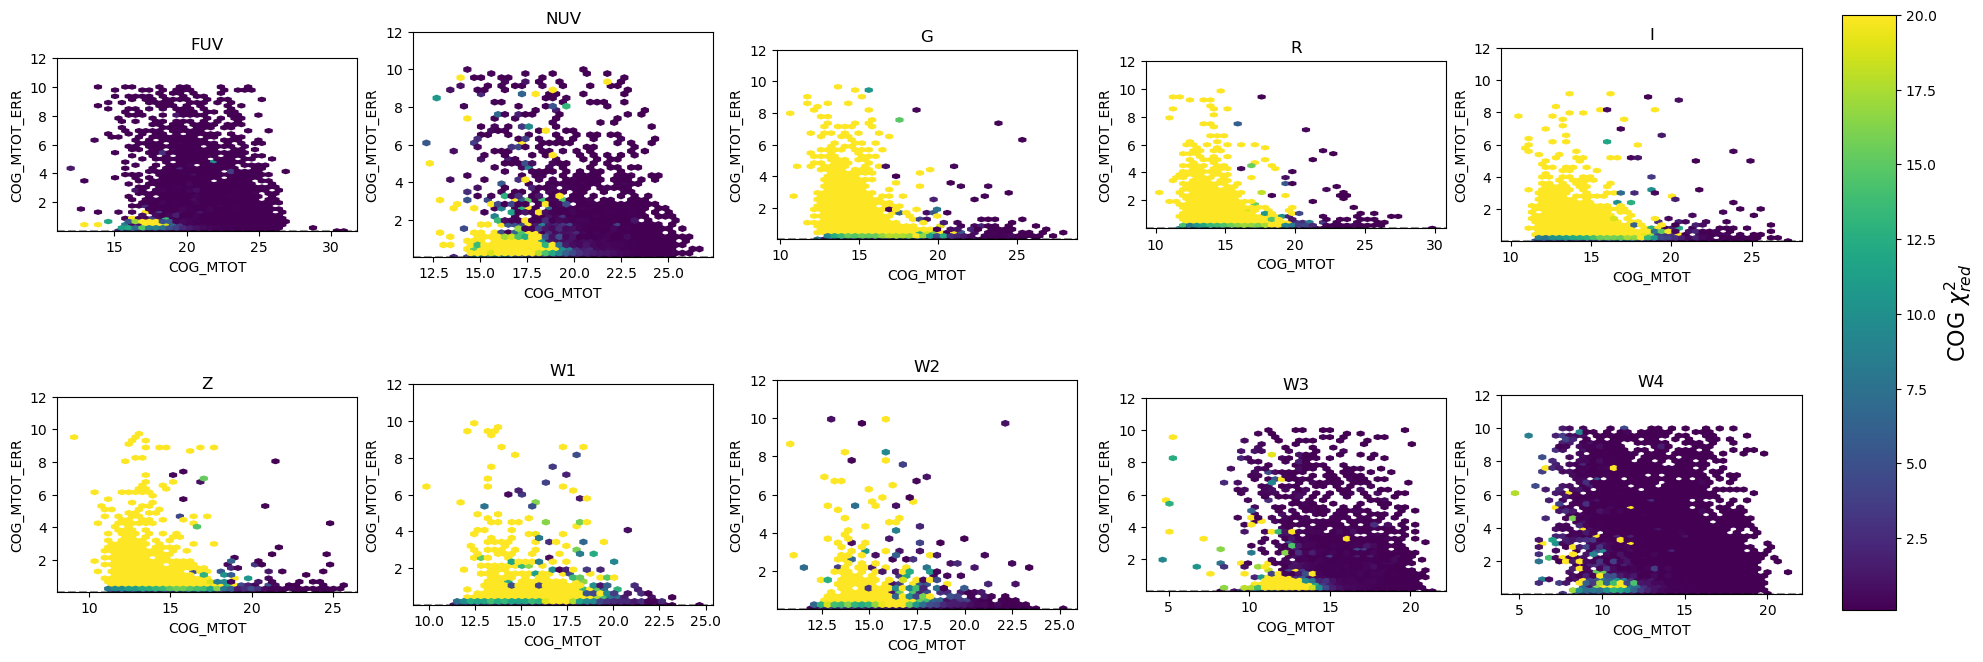

In [241]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 7), constrained_layout=True)
axes_flat = axes.ravel()

for i, ax in enumerate(axes_flat, start=1):
       
    red_chi2 = ellipse_tab[chi_2s[i-1]] / ellipse_tab[n_dofs[i-1]]

    ax.set_title(bands[i-1])
    ax.set_xlabel("COG_MTOT")
    ax.set_ylabel("COG_MTOT_ERR")
    
    err_flag = (ellipse_tab[mtot_errs[i-1]] < 10) & (ellipse_tab[mtots[i-1]] != 0)

    xdata = ellipse_tab[err_flag][mtots[i-1]]
    ydata = np.log10(ellipse_tab[err_flag][mtot_errs[i-1]])
    cdata = red_chi2[err_flag]

    im1 = ax.hexbin(
        xdata, ydata, C=cdata,
        reduce_C_function=np.mean,  # or np.median, np.sum, etc.
        gridsize=40,                # horizontal resolution
        cmap="viridis", vmin=0.1, vmax=20,
        extent=[xdata.min(), xdata.max(), ydata.min(), ydata.max()]
    )

    ax.axhline(0, color='black', ls='--', alpha=0.4)
    ax.set_ylim(2e-3, 12)

    #keep hexagons from stretching
    ax.set_aspect('equal', adjustable='box')

cbar_ax = fig.add_axes([1.02, 0.085, 0.03, 0.85]) 
cbar = fig.colorbar(im1, cax=cbar_ax)
cbar.set_label(r'COG $\chi^2_{red}$', fontsize=16)
cbar.solids.set(alpha=1)

plt.show()

### Outliers

In [18]:
for band in bands:
    large_err_flag = (ellipse_tab[f'COG_MTOT_ERR_{band}']>10)
    
    if np.sum(large_err_flag)>0:
        sganame = ellipse_tab['SGAID'][large_err_flag]

        print(f'Galaxies with >10 {band} MTOT ERR: {len(sganame)}') 
        print(f'{sganame.data}')
        print()

Galaxies with >10 FUV MTOT ERR: 1111

[   8805    8868   22939 ... 5053502 5053504 5054810]

Galaxies with >10 NUV MTOT ERR: 370

[  23513   33165   65956  190362  210653  227206  314165  325833  330972
  362209  397091  402706  405828  453713  497071  505819  577625  592347
 1336754 1503316 1647695 3140781 3142347 3146727 3146748 3147483 3163078
 3190226 3195505 3201620 3205338 3259373 3365230 3366919 3517131 3533756
 3635778 3666150 3689886 3713397 3903663 3923234 3944571 4092411 4101574
 4102219 4104993 4129559 4163099 4198352 4198576 4675673 4677940 4678190
 4679509 4679716 4680284 4680539 4686254 4686780 4687934 4689711 4690465
 4692836 4692936 4693140 4693622 4694020 4694417 4695750 4696944 4697197
 4697754 4698074 4698520 4698851 4700401 4705793 4706252 4710420 4710997
 4711195 4713461 4717507 4717812 4718527 4718948 4720536 4720590 4720653
 4720667 4723447 4723679 4727908 4728314 4729095 4733839 4734392 4734726
 4737042 4737230 4737422 4738672 4738993 4739609 4741316 4741522 4742413
 4742567 4743467 4743856 4744326 4744587 4746690 4752191 4752366 4752707
 4755586 4756505 4757262 4758696 4760353 4761219 4761705 4762402 4763617
 4764142 4765727 4766969 4767567 4769147 4769318 4769917 4771896 4774157
 4775101 4776479 4776584 4778982 4779150 4779793 4780168 4780487 4782174
 4782291 4782310 4782414 4783826 4784173 4786143 4786545 4788035 4788243
 4789643 4789817 4790490 4791661 4791680 4791706 4791904 4792092 4792157
 4792472 4792685 4793476 4794239 4795844 4796483 4798264 4799260 4801581
 4803688 4805248 4805373 4805563 4809414 4810211 4810305 4810685 4813609
 4814835 4815119 4816496 4818448 4820152 4823912 4828690 4828986 4829483
 4829513 4829910 4830081 4830965 4831050 4833974 4835681 4835828 4836093
 4836453 4836629 4838172 4838239 4838240 4838677 4839890 4841251 4844500
 4846832 4847344 4849385 4850092 4851021 4851772 4852357 4852636 4853274
 4854859 4855785 4860785 4861865 4862696 4863526 4864457 4870227 4871452
 4875869 4876913 4877079 4880077 4881427 4881638 4882359 4883539 4883578
 4883877 4884060 4885232 4885551 4886631 4887558 4888906 4890730 4891111
 4894781 4895704 4900838 4901587 4903356 4903899 4904556 4907277 4907943
 4908907 4908986 4909345 4910490 4912803 4915897 4917163 4917519 4918876
 4919366 4920233 4921384 4921685 4921933 4924668 4924799 4926541 4928291
 4929647 4929889 4930773 4931155 4931526 4931581 4931681 4932576 4933686
 4934167 4934967 4936443 4937023 4937081 4937646 4937948 4939600 4944589
 4947904 4948991 4949331 4949366 4949683 4950574 4951460 4952072 4952263
 4954906 4958101 4958521 4958622 4958629 4958893 4961405 4963292 4963489
 4964545 4965347 4968101 4968603 4970504 4970840 4971037 4971255 4972358
 4973466 4976401 4977084 4978058 4978350 4979120 4981314 4982090 4982398
 4988791 4988996 4991046 4995238 4995745 4998736 4999524 4999612 5000421
 5001544 5002956 5003887 5004421 5004688 5005321 5012567 5013217 5013975
 5014940 5018400 5019549 5020884 5022400 5022970 5023560 5024420 5024657
 5025141 5025669 5026596 5027622 5028942 5031619 5035193 5035408 5041810
 5043868 5044838 5044908 5045877 5046371 5048036 5048109 5048887 5052064
 5055459]

Galaxies with >10 G MTOT ERR: 115

[   1024    1158    3004    3709   36362   38685   41362   46277   52381
   55723   56288   57458   75953   77045   87904   95828  120708  139899
  163374  171297  180464  188869  217075  237437  277526  289427  295247
  349916  363025  396350  396819  399276  405819  410742  411581  429024
  440000  455517  456771  464659  466994  501165  502356  584670  916329
  942883  982101 1073513 1271302 1277185 1278555 1278575 1278973 1352304
 1780988 2372133 2391273 3112690 3139367 3141446 3147101 3147742 3151251
 3153469 3299351 3406857 3486259 3614026 3614027 3893850 3923334 4103409
 4130515 4164802 4196269 4203482 4393393 4694958 4716404 4716469 4717057
 4736849 4741771 4743396 4744302 4751590 4760203 4789239 4802102 4802328
 4824831 4843765 4850370 4854025 4876472 4894535 4898256 4899849 4904831
 4922903 4928902 4954423 4960947 4976749 4987051 4993801 4994989 5003518
 5010456 5023991 5024753 5039644 5046315 5052450 5054089]

Galaxies with >10 R MTOT ERR: 95

[   2110    2690    3229    9231   36362   41362   43339   48713   50808
   52381   55723   56288   57458   75953   87904   95828  130074  149596
  156333  157297  162065  171297  173236  186663  188869  193957  241005
  242245  261356  271410  277526  295247  300277  319122  327631  349916
  354075  363025  379791  396819  410742  440000  456771  462254  466994
  501165  916329  942883  982101  996981 1073513 1271302 1277185 1278555
 1278973 1315185 1352304 1780988 3139980 3147742 3148633 3170117 3189235
 3406857 3660593 3810091 4129737 4196733 4369544 4393393 4716469 4742012
 4744560 4751590 4760203 4760385 4789239 4812197 4824831 4829389 4854025
 4898256 4901299 4903651 4922903 4957357 4970730 4987051 4993801 4994989
 5003518 5020401 5023991 5039644 5054089]

Galaxies with >10 I MTOT ERR: 112

[   2625    2690    9313   12038   36362   41012   41335   41362   48713
   52381   56288   57458   58145   58483   59176   59390   59451   60520
   65030   75953   78814   87904   95828   97363  120708  126375  156333
  161687  173626  186663  193957  235625  241005  313274  363025  396819
  397674  402628  406993  409063  429496  439952  445718  447819  450453
  456771  458524  462254  464798  942883  982101 1063314 1271302 1278973
 1282983 1352304 1780988 2372133 3139949 3140613 3143150 3145502 3147244
 3147742 3149318 3158744 3168636 3179203 3198153 3614027 3614311 3810091
 4102020 4131027 4162756 4701300 4706860 4708663 4716469 4725809 4751590
 4764953 4775409 4783188 4783274 4789239 4797670 4803754 4811732 4824831
 4832511 4835095 4853633 4896857 4905103 4908701 4919180 4919864 4924093
 4945681 4946849 4964703 4970730 4987648 4992093 4996755 5001533 5017706
 5033806 5050970 5053142 5054089]

Galaxies with >10 Z MTOT ERR: 128

[   1158    1994    3229    8591    8912    9155   12038   36362   38685
   41362   43339   46728   50808   57458   59451   75953   87375   87904
   89262   95828  123394  129944  139899  153168  154133  157297  161687
  164632  171858  173548  176488  176790  187365  188869  215542  217075
  217712  221882  235625  236477  237437  240674  241005  242556  245044
  245347  252185  277526  289427  312575  327631  363025  367405  390163
  395338  396819  409063  419729  427649  440000  450453  450728  456771
  457521  458524  487015  501165  592353  916329  925021  982101 1062900
 1073513 1085502 1271302 1277185 1278973 1281588 1315185 1352304 1647451
 1780988 2391273 3139592 3141643 3145502 3146264 3147054 3147212 3147742
 3149318 3168636 3170117 3251048 3406857 4103526 4131027 4393393 4689225
 4736849 4743696 4748365 4751590 4758534 4760203 4768535 4806801 4819955
 4823557 4824831 4839338 4854025 4883990 4901299 4903651 4911312 4916318
 4922903 4933123 4940749 4976749 4993801 5001741 5003518 5020051 5023991
 5039644 5054089]

Galaxies with >10 W1 MTOT ERR: 154

[  12141   49198   66684  109586  139899  161687  162065  171400  240387
  241835  245796  321177  453571  456503 1278973 1306572 1437115 3140013
 3141269 3143910 3145811 3146430 3147348 3147525 3167046 3167087 3169389
 3198790 3252363 3253349 3259191 3613894 3620696 3687981 3761906 3893850
 4102809 4130064 4132845 4144996 4162831 4257800 4260229 4677968 4686304
 4687318 4687533 4692134 4692998 4693089 4693367 4695343 4698864 4701512
 4704073 4707936 4716033 4716321 4716404 4720325 4732276 4736865 4741568
 4741758 4744970 4745101 4748468 4759503 4761728 4763315 4766591 4768786
 4770939 4779527 4781526 4786980 4787095 4788712 4791071 4794731 4801899
 4805559 4812847 4813244 4831940 4835859 4840662 4847275 4853952 4854149
 4859621 4863093 4863594 4870687 4875961 4882124 4882827 4882963 4896332
 4896850 4898575 4900941 4902373 4902622 4905034 4908427 4908506 4909428
 4910361 4912324 4920958 4923264 4925686 4926310 4928432 4929137 4934594
 4934855 4963312 4967765 4969902 4971255 4975651 4978744 4980242 4982526
 4987051 4990058 4990606 4992917 4993903 4995244 4999298 5003048 5005106
 5005771 5007306 5025198 5034123 5036904 5038151 5041305 5041755 5044639
 5047450 5050110 5052370 5053024 5053250 5054707 5054762 5055459 5055595
 5056650]

Galaxies with >10 W2 MTOT ERR: 166

[   1610    2496    8943   33664   49198   66684  131797  156001  171400
  240387  241005  245796  321177  323476  453571  455517  456503 1294825
 1306572 1370381 3140013 3141269 3142515 3145664 3145811 3146430 3146780
 3146831 3149511 3160201 3167046 3259191 3614027 3616132 3640099 3674944
 3679415 3687981 3761906 4102012 4102555 4102809 4144996 4162831 4211071
 4562940 4626786 4686731 4689225 4689739 4690477 4691484 4692998 4693367
 4694875 4696300 4696966 4698902 4703197 4710342 4711043 4716404 4722172
 4736528 4737486 4739728 4741568 4741758 4743950 4747688 4751923 4755572
 4755644 4757370 4759191 4759503 4763315 4765647 4766591 4775461 4779974
 4782923 4785654 4789623 4791392 4792612 4805559 4808969 4809121 4810566
 4819170 4820601 4827552 4831940 4835235 4844838 4846062 4849391 4859621
 4860592 4862831 4863093 4863594 4864104 4866320 4870687 4875961 4876062
 4882963 4885808 4891091 4895764 4896371 4898575 4900941 4901784 4902373
 4902622 4904571 4908506 4909428 4910361 4925686 4926310 4928432 4939815
 4941267 4941399 4942437 4945817 4948640 4956384 4957899 4961171 4963312
 4965162 4975651 4976364 4980242 4982526 4982682 4985647 4987051 4987201
 4992917 5000445 5004302 5005771 5006386 5007306 5010783 5011962 5020321
 5020497 5022094 5025198 5026183 5026859 5034093 5034280 5040031 5041755
 5047249 5052370 5056421 5056641]

Galaxies with >10 W3 MTOT ERR: 551

[   2284    2507    9018   66614  127101  142549  142602  160045  163374
  164656  171400  202479  241905  267615  292869  311991  337341  359888
  363769  397091  424436  424589  455740  457040  577059  577625 1228038
 1278973 1282897 3136963 3145369 3146068 3146795 3147408 3147426 3148841
 3153680 3178038 3259191 3273377 3441481 3532098 3613894 3613895 3613985
 3718749 3761970 3854952 3922786 4196472 4196779 4198234 4200515 4672494
 4676497 4677037 4677521 4678532 4678827 4679356 4679601 4679606 4680727
 4683040 4684296 4685585 4685980 4686204 4687044 4687341 4688027 4689064
 4689315 4689417 4689482 4690242 4690685 4691030 4691846 4693007 4694020
 4694248 4694825 4695928 4696128 4696407 4696762 4697754 4699331 4699579
 4700479 4701671 4702174 4702263 4704176 4707610 4708356 4708995 4709338
 4710411 4712307 4712449 4712513 4713649 4714216 4716071 4717262 4717728
 4717802 4718549 4718729 4719262 4719415 4720010 4720951 4721699 4721878
 4722391 4723899 4724496 4725521 4726878 4726901 4727178 4728233 4728583
 4729624 4730969 4731002 4731291 4731917 4733047 4733658 4734221 4734726
 4735592 4736972 4737032 4737394 4738353 4738603 4739558 4739620 4740174
 4740567 4740874 4741235 4741868 4742855 4743472 4744277 4744587 4744778
 4744918 4745488 4745943 4746009 4747353 4747818 4748129 4749174 4749414
 4750023 4750152 4750799 4751045 4752366 4753233 4754449 4755684 4758066
 4758470 4761835 4763932 4764586 4764714 4765774 4765827 4765895 4767013
 4767193 4767452 4767552 4768494 4768560 4768684 4768865 4772129 4774088
 4774378 4774944 4775263 4776035 4776842 4778772 4778779 4779310 4780139
 4780443 4781430 4782187 4782829 4783325 4783998 4785342 4785456 4786065
 4786239 4787095 4787735 4787890 4789676 4790198 4790837 4791232 4792083
 4793232 4793777 4794649 4796065 4797128 4798172 4798327 4798613 4798818
 4798980 4799191 4799672 4800612 4801060 4802012 4803080 4804505 4804698
 4804812 4805373 4805972 4807080 4809291 4809395 4809536 4809950 4811472
 4811553 4812163 4812749 4812906 4813368 4814220 4814626 4814955 4815050
 4815491 4816684 4817744 4818201 4818880 4819833 4823802 4824163 4826076
 4826970 4827712 4828781 4829593 4830054 4830591 4831268 4831344 4833277
 4834201 4834524 4836251 4836326 4837425 4838019 4838677 4838691 4839666
 4840071 4841413 4842650 4842730 4844213 4845502 4845556 4845968 4846006
 4846435 4846528 4847275 4847980 4848872 4849797 4850525 4852123 4852356
 4852814 4853672 4854707 4854867 4855176 4856658 4857248 4857424 4858464
 4860111 4860596 4860643 4861448 4861594 4861968 4863253 4864646 4865396
 4866003 4866281 4867096 4867468 4868461 4870397 4871452 4871586 4872878
 4874285 4874492 4876231 4876668 4876674 4876902 4879734 4880164 4880881
 4880913 4881229 4883886 4884209 4884715 4885149 4885471 4886361 4887075
 4887471 4888737 4890433 4895019 4895811 4895983 4897130 4898831 4898993
 4899533 4899983 4900459 4902716 4904352 4905230 4905558 4905731 4905963
 4907148 4908406 4908414 4911286 4911643 4913304 4917519 4919165 4920762
 4921786 4922869 4922966 4923455 4923686 4923761 4924084 4924754 4924933
 4925154 4925252 4926211 4926494 4926777 4926863 4927531 4927579 4928508
 4929018 4929253 4931043 4931344 4932021 4932828 4935208 4935425 4935519
 4938062 4938687 4940312 4940474 4941922 4942051 4943049 4944159 4944719
 4945942 4946292 4946844 4946996 4947279 4947644 4947705 4948558 4948573
 4949264 4949429 4949842 4949985 4950010 4950112 4950229 4950534 4953256
 4953270 4957403 4957480 4959444 4960252 4960695 4960834 4961000 4963982
 4965123 4967233 4967576 4967960 4968072 4968164 4969377 4970321 4970873
 4971147 4971443 4971623 4972018 4975556 4975953 4976480 4979357 4981315
 4981776 4981915 4982011 4982115 4982240 4982266 4983272 4983507 4985563
 4986293 4990231 4991336 4993546 4995171 4995260 4996316 4996755 4997600
 4998149 4998934 4999240 4999807 5000429 5000593 5001218 5001328 5002819
 5002827 5003522 5003684 5004187 5004580 5004788 5005802 5005946 5006079
 5006633 5006941 5007205 5008970 5010077 5010551 5012929 5

Galaxies with >10 W4 MTOT ERR: 1533

[   1672    1682    2205 ... 5054243 5054707 5057330]

#### g-r vs. r-z plot:

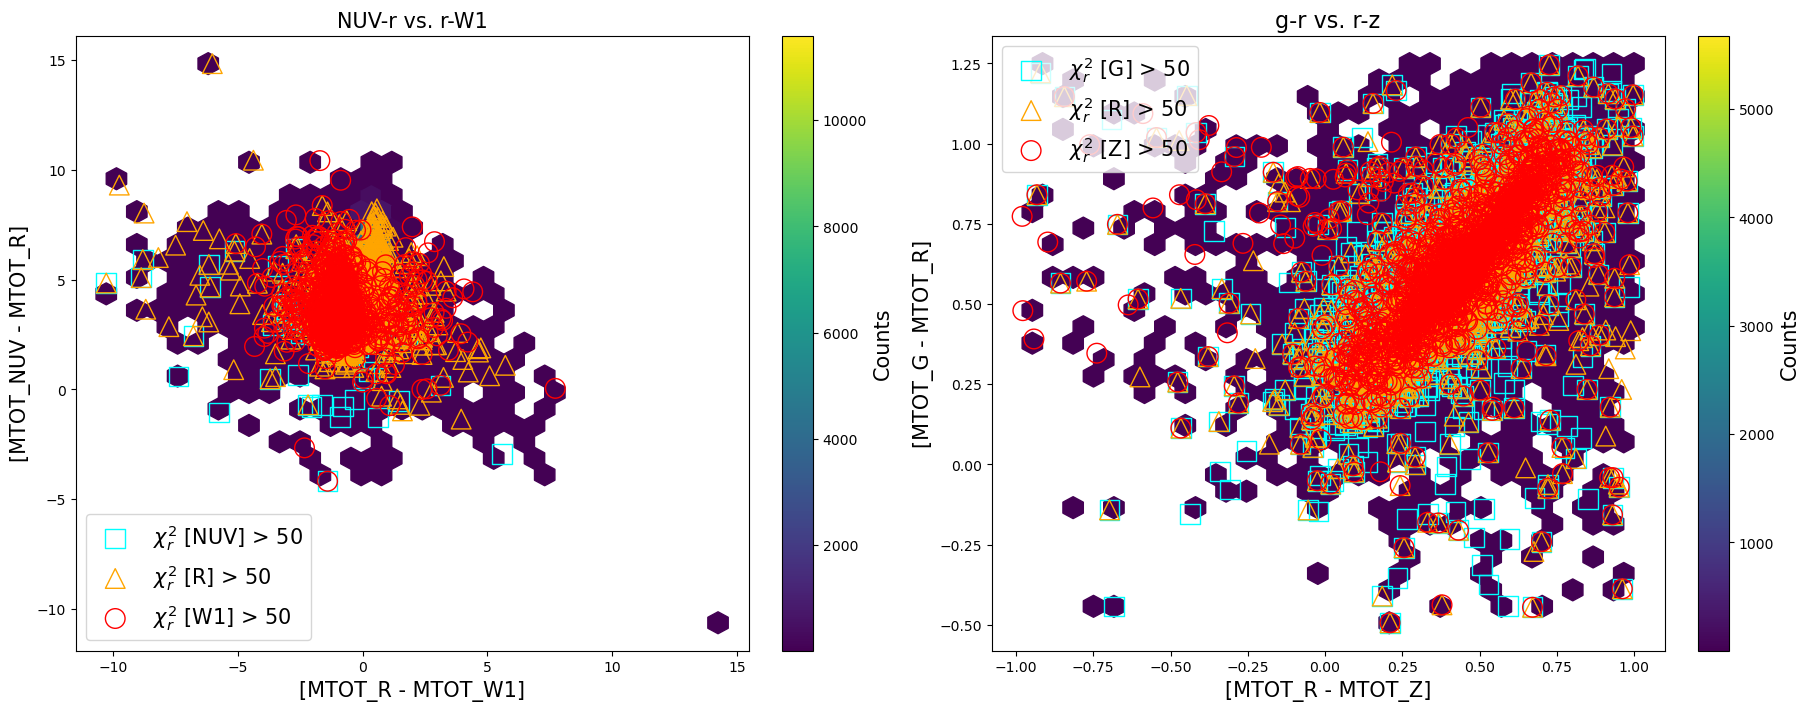

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7), constrained_layout=True)
ax1, ax2 = axes.ravel()

chi2_lim = 50

##############################
#left panel, NUV-r vs. r-W1
##############################

#removing cases with MTOT == 0, just in case
err_flag = (ellipse_tab['COG_MTOT_W1']!=0) & \
(ellipse_tab['COG_MTOT_R']!=0) & \
(ellipse_tab['COG_MTOT_NUV']!=0)

#defining some reduced chi^2 limit for the relevant bands' COGs
red_chi2_nuv = ((ellipse_tab['COG_CHI2_NUV']/ellipse_tab['COG_NDOF_NUV']) > chi2_lim) & err_flag 
red_chi2_r = ((ellipse_tab['COG_CHI2_R']/ellipse_tab['COG_NDOF_R']) > chi2_lim) & err_flag 
red_chi2_w1 = ((ellipse_tab['COG_CHI2_W1']/ellipse_tab['COG_NDOF_W1']) > chi2_lim) & err_flag 

nuv_r = ellipse_tab['COG_MTOT_NUV'] - ellipse_tab['COG_MTOT_R'] 
r_w1 = ellipse_tab['COG_MTOT_R'] - ellipse_tab['COG_MTOT_W1']

#hexbin density map...
im1 = ax1.hexbin(r_w1[err_flag], nuv_r[err_flag], gridsize=30, cmap='viridis', mincnt=1)
cb1 = fig.colorbar(im1, ax=ax1)
cb1.set_label('Counts', fontsize=15)

ax1.scatter(r_w1[red_chi2_nuv], nuv_r[red_chi2_nuv], marker='s',
            edgecolor='cyan', facecolor='none', s=200, label=fr'$\chi^2_r$ [NUV] > {chi2_lim}')
ax1.scatter(r_w1[red_chi2_r], nuv_r[red_chi2_r], marker='^',
            edgecolor='orange', facecolor='none', s=200, label=fr'$\chi^2_r$ [R] > {chi2_lim}')
ax1.scatter(r_w1[red_chi2_w1], nuv_r[red_chi2_w1], marker='o',
            edgecolor='red', facecolor='none', s=200, label=fr'$\chi^2_r$ [W1] > {chi2_lim}')

#labels and such
ax1.set_xlabel("[MTOT_R - MTOT_W1]",fontsize=15)
ax1.set_ylabel("[MTOT_NUV - MTOT_R]",fontsize=15)

ax1.legend(fontsize=15, loc='lower left')
ax1.set_title('NUV-r vs. r-W1', fontsize=15)

##############################
##############################
##############################

#removing cases with MTOT == 0, just in case
err_flag = (ellipse_tab['COG_MTOT_G']!=0) & \
(ellipse_tab['COG_MTOT_R']!=0) & \
(ellipse_tab['COG_MTOT_Z']!=0)

#defining the colors
g_r = ellipse_tab['COG_MTOT_G'] - ellipse_tab['COG_MTOT_R'] 
r_z = ellipse_tab['COG_MTOT_R'] - ellipse_tab['COG_MTOT_Z']

#color flag (to remove significant outliers)
color_flag = (g_r > -0.5) & (g_r < 1.25) & (r_z > -1.) & (r_z < 1.)

#defining some reduced chi^2 limit for the optical bands' COGs
red_chi2_g = ((ellipse_tab['COG_CHI2_G']/ellipse_tab['COG_NDOF_G']) > chi2_lim) & err_flag & color_flag
red_chi2_r = ((ellipse_tab['COG_CHI2_R']/ellipse_tab['COG_NDOF_R']) > chi2_lim) & err_flag & color_flag
red_chi2_z = ((ellipse_tab['COG_CHI2_Z']/ellipse_tab['COG_NDOF_Z']) > chi2_lim) & err_flag & color_flag

#right panel, the 'clips'
#hexbin density map...
im2 = ax2.hexbin(r_z[color_flag & err_flag], g_r[color_flag & err_flag], gridsize=30, cmap='viridis', mincnt=1)
cb2 = fig.colorbar(im2, ax=ax2)
cb2.set_label('Counts', fontsize=15)

#flagged points with high-ish reduced chi^2
ax2.scatter(r_z[red_chi2_g], g_r[red_chi2_g], marker='s',
            edgecolor='cyan', facecolor='none', s=200, label=fr'$\chi^2_r$ [G] > {chi2_lim}')

ax2.scatter(r_z[red_chi2_r], g_r[red_chi2_r], marker='^',
            edgecolor='orange', facecolor='none', s=200, label=fr'$\chi^2_r$ [R] > {chi2_lim}')

ax2.scatter(r_z[red_chi2_z], g_r[red_chi2_z], marker='o',
            edgecolor='red', facecolor='none', s=200, label=fr'$\chi^2_r$ [Z] > {chi2_lim}')

#labels and such
ax2.set_xlabel("[MTOT_R - MTOT_Z]",fontsize=15)
ax2.set_ylabel("[MTOT_G - MTOT_R]",fontsize=15)

ax2.legend(loc='upper left',fontsize=15)
ax2.set_title('g-r vs. r-z', fontsize=16)

plt.show()

### QA Five
#### SMA50_ vs. SMA_MOMENT
 - This diagnostic will give us an idea of how these properties correlate
   - i.e., can SMA_MOMENT/2 be a reasonable proxy for the half-light radius?
 - Note that I specifically plot 2 * SMA50_ vs. SMA_MOMENT
 - Also note that SMA50 is based on the COG model. Half-light radius.
 - Bands: NUV, GRIZ, W1
 

In [20]:
bands=['NUV','G','R','I','Z','W1']   #uppercase GRIZ for SMA50

chi_2s = [f'COG_CHI2_{band}' for band in bands]
n_dofs = [f'COG_NDOF_{band}' for band in bands]
sma50 = [f'SMA50_{band}' for band in bands]

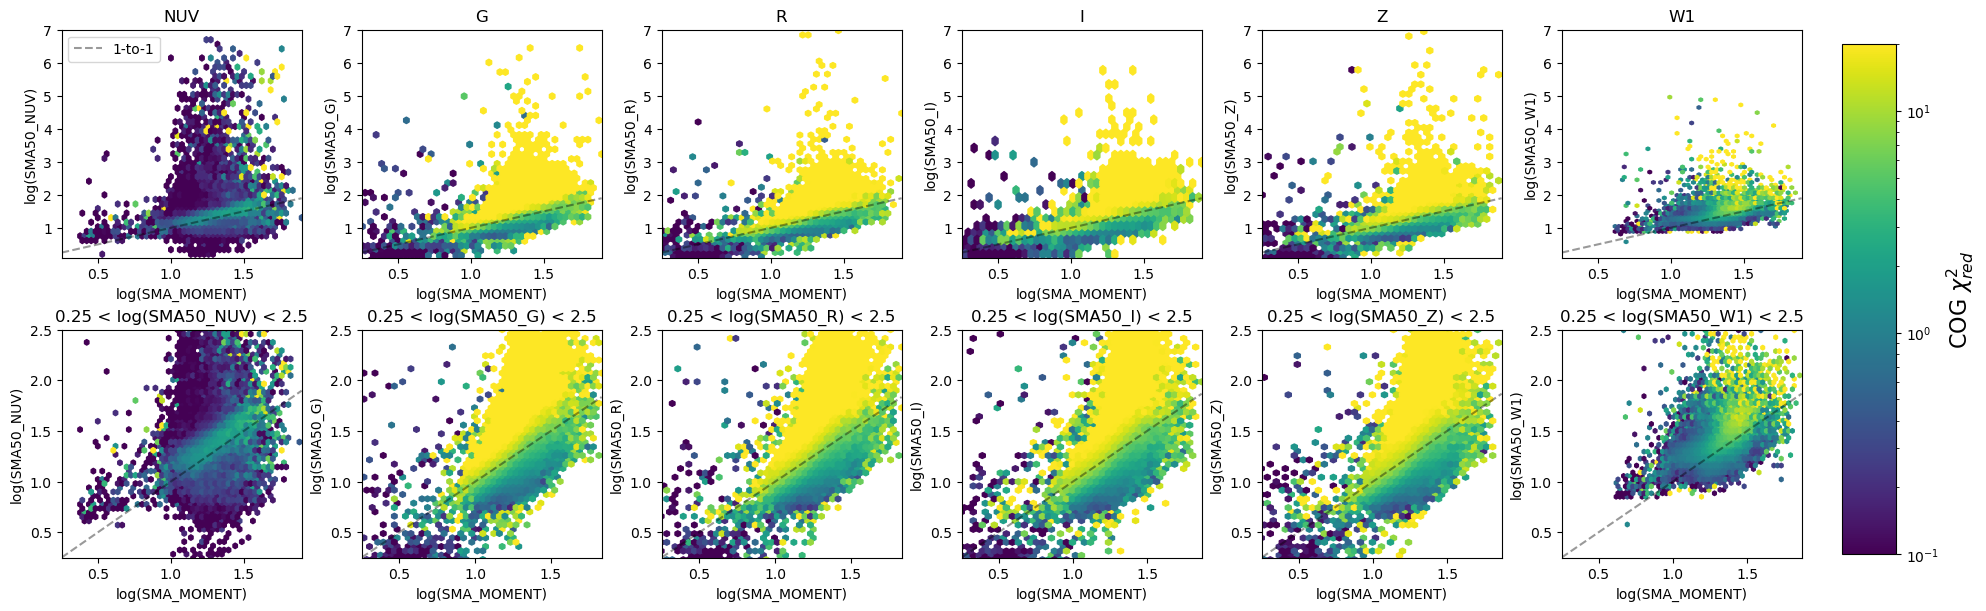

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18, 6), constrained_layout=True)

axes_flat = axes.ravel()

for i, ax in enumerate(axes_flat, start=1):
    
    if i<7:
        index = i-1
        ylim = 0.1, 7
        title = bands[index]
        
        flag=np.ones(len(ellipse_tab), dtype=bool)
        
    else:
        index = i-7
        ylim = 0.25, 2.5
        title = f'{ylim[0]} < log(SMA50_{bands[index]}) < {ylim[1]}'
        
        flag=(np.log10(ellipse_tab[sma50[index]]*2)<2.5) & (np.log10(ellipse_tab[sma50[index]]*2)>0.1)
    
    #reduced chi-squared
    red_chi2 = ellipse_tab[chi_2s[index]][flag] / ellipse_tab[n_dofs[index]][flag]
    
    x=np.log10(ellipse_tab['SMA_MOMENT'])[flag]
    y=np.log10(ellipse_tab[sma50[index]]*2)[flag]
    
    xlim = 0.25, np.max(x)
    
    ax.set_title(title)
    ax.set_xlabel("log(SMA_MOMENT)")
    ax.set_ylabel(f"log(SMA50_{bands[index]})")
    im = ax.hexbin(x, y, C=red_chi2,
        gridsize=50, mincnt=1,
        reduce_C_function=np.median,
        bins='log', vmin=0.1, vmax=20)
    
    ax.axline([0,0],slope=1,color='black',ls='--',alpha=0.4, label='1-to-1')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    if i==1:
        ax.legend(loc='upper left')

        
cbar_ax = fig.add_axes([1.02, 0.085, 0.03, 0.85]) 
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r'COG $\chi^2_{red}$', fontsize=16)
cbar.solids.set(alpha=1)        

plt.show()

#### Outliers

In [22]:
for i, band in enumerate(bands):
    
    diff_sma = ellipse_tab['SMA_MOMENT'] - (2*ellipse_tab[sma50[i-1]])
    relative_diff_sma = diff_sma/ellipse_tab['SMA_MOMENT']
    
    flag50 = (np.abs(relative_diff_sma)>0.5)
    print(f'[yellow] Number of galaxies with relative separations > 0.5 for {band}: {np.sum(flag50)}')
    
    flag300 = (np.abs(relative_diff_sma)>30.0)
    print(f'[yellow] Number of galaxies with relative separations > 30.0 for {band}: {np.sum(flag300)}')
    
    galaxies=ellipse_tab[flag300]
    
    for galaxy in galaxies:
        sganame=galaxy['SGAID']
        print(f'Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_{band}: {sganame}')
        print(f'Separation: {galaxy["SMA_MOMENT"]-(2*galaxy[sma50[i-1]]):.2e}')
        print()

 Number of galaxies with relative separations > 0.5 for NUV: 19482

 Number of galaxies with relative separations > 30.0 for NUV: 66

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 9099

Separation: -2.32e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 49198

Separation: -9.06e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 66684

Separation: -2.14e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 139899

Separation: -2.85e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 171400

Separation: -7.69e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 240387

Separation: -2.36e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 245796

Separation: -1.28e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 457040

Separation: -2.60e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 1294825

Separation: -2.19e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 1306572

Separation: -3.65e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 1370381

Separation: -5.46e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 1437115

Separation: -1.75e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 3136933

Separation: -2.15e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 3167087

Separation: -1.38e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 3197203

Separation: -5.04e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 3252363

Separation: -1.51e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 3253349

Separation: -3.01e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 3259191

Separation: -1.15e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 3613894

Separation: -1.41e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4677968

Separation: -1.45e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4692998

Separation: -5.90e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4693089

Separation: -5.22e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4693367

Separation: -2.25e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4696966

Separation: -8.56e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4716404

Separation: -2.11e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4732276

Separation: -7.23e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4736849

Separation: -4.83e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4741568

Separation: -1.81e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4744970

Separation: -1.05e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4758008

Separation: -4.60e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4759503

Separation: -5.88e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4763315

Separation: -5.42e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4763688

Separation: -1.94e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4769979

Separation: -4.42e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4779527

Separation: -9.25e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4781379

Separation: -5.65e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4783460

Separation: -6.21e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4805559

Separation: -8.34e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4821133

Separation: -4.08e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4823557

Separation: -1.22e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4860254

Separation: -7.37e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4875961

Separation: -3.89e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4882963

Separation: -7.74e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4890326

Separation: -6.43e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4902373

Separation: -7.49e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4910361

Separation: -4.35e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4934594

Separation: -2.21e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4950112

Separation: -3.36e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4960249

Separation: -2.95e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4975734

Separation: -2.05e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4982526

Separation: -1.01e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4982999

Separation: -2.45e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 4992917

Separation: -1.52e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 5021103

Separation: -7.77e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 5025384

Separation: -2.40e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 5034123

Separation: -9.93e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 5051262

Separation: -1.21e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 5054162

Separation: -7.51e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 5054242

Separation: -1.85e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 5054707

Separation: -8.61e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 5054762

Separation: -7.04e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 5055384

Separation: -1.62e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 5056421

Separation: -5.38e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 5056641

Separation: -6.51e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 5056679

Separation: -3.65e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_NUV: 5056851

Separation: -4.53e+03

 Number of galaxies with relative separations > 0.5 for G: 42384

 Number of galaxies with relative separations > 30.0 for G: 697

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 23472

Separation: -6.88e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 23513

Separation: -4.49e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 33165

Separation: -1.39e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 103364

Separation: -1.65e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 120302

Separation: -9.47e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 190362

Separation: -1.81e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 227206

Separation: -1.96e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 245796

Separation: -1.21e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 265617

Separation: -4.74e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 330972

Separation: -1.20e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 453713

Separation: -5.44e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 497071

Separation: -4.15e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 577625

Separation: -1.11e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 577761

Separation: -3.20e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 592347

Separation: -1.15e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 1336754

Separation: -1.16e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 1503316

Separation: -2.34e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3138957

Separation: -3.65e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3141158

Separation: -2.71e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3142327

Separation: -1.08e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3142347

Separation: -1.95e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3142634

Separation: -1.14e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3143627

Separation: -1.87e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3143976

Separation: -1.06e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3144156

Separation: -1.91e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3144617

Separation: -5.08e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3144675

Separation: -1.18e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3144757

Separation: -3.50e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3145877

Separation: -2.38e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3146727

Separation: -1.76e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3146754

Separation: -4.55e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3147483

Separation: -3.46e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3148480

Separation: -4.12e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3148534

Separation: -1.27e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3150242

Separation: -1.74e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3163078

Separation: -2.73e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3176740

Separation: -6.56e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3178943

Separation: -4.08e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3189537

Separation: -4.33e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3189727

Separation: -4.49e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3190226

Separation: -3.94e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3191697

Separation: -3.89e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3194624

Separation: -4.11e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3195505

Separation: -1.15e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3196768

Separation: -7.73e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3198092

Separation: -4.93e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3257061

Separation: -1.20e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3365230

Separation: -2.96e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3366919

Separation: -6.28e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3391515

Separation: -4.33e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3485110

Separation: -1.89e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3517131

Separation: -1.14e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3612317

Separation: -6.88e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3614187

Separation: -6.79e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3713397

Separation: -3.22e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3865173

Separation: -2.53e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3898391

Separation: -8.37e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3923234

Separation: -1.24e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 3944571

Separation: -2.16e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4101512

Separation: -3.47e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4102219

Separation: -5.59e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4104993

Separation: -1.04e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4132933

Separation: -6.75e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4133114

Separation: -1.46e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4162658

Separation: -7.81e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4163099

Separation: -3.01e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4195944

Separation: -1.59e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4196322

Separation: -1.27e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4197062

Separation: -7.77e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4198060

Separation: -9.58e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4198352

Separation: -3.29e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4674869

Separation: -4.41e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4677940

Separation: -2.13e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4677968

Separation: -2.37e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4679747

Separation: -2.88e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4680539

Separation: -7.53e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4680726

Separation: -2.13e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4680803

Separation: -1.92e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4681321

Separation: -3.42e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4683549

Separation: -7.48e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4683948

Separation: -6.78e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4684098

Separation: -5.47e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4686144

Separation: -1.03e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4686186

Separation: -1.99e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4686254

Separation: -2.42e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4686488

Separation: -4.11e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4686603

Separation: -1.58e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4686780

Separation: -7.66e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4687250

Separation: -2.92e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4687616

Separation: -5.65e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4687934

Separation: -7.39e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4689711

Separation: -1.10e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4689863

Separation: -1.81e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4690428

Separation: -2.16e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4690465

Separation: -1.49e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4690840

Separation: -7.22e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4690875

Separation: -8.11e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4691029

Separation: -6.25e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4691163

Separation: -2.25e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4691510

Separation: -1.78e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4691574

Separation: -1.03e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4692413

Separation: -6.01e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4692509

Separation: -8.04e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4692722

Separation: -3.88e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4692841

Separation: -7.59e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4692936

Separation: -1.22e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4692998

Separation: -1.21e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4693117

Separation: -1.12e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4693140

Separation: -3.58e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4693622

Separation: -3.02e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4694020

Separation: -1.17e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4695466

Separation: -2.80e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4695750

Separation: -4.56e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4695763

Separation: -1.80e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4696944

Separation: -1.57e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4697197

Separation: -5.02e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4697226

Separation: -4.55e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4697354

Separation: -1.17e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4697390

Separation: -5.96e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4697754

Separation: -3.50e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4698617

Separation: -1.03e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4700401

Separation: -3.42e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4701245

Separation: -9.37e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4702212

Separation: -4.30e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4703650

Separation: -3.71e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4705145

Separation: -4.23e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4706252

Separation: -1.92e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4709380

Separation: -1.26e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4709670

Separation: -3.19e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4710698

Separation: -3.09e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4710717

Separation: -6.97e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4710863

Separation: -7.90e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4711195

Separation: -8.69e+07

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4711256

Separation: -9.50e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4711683

Separation: -1.93e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4712022

Separation: -6.39e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4712044

Separation: -4.79e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4712099

Separation: -2.13e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4712699

Separation: -4.78e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4712996

Separation: -2.97e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4713243

Separation: -6.14e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4713461

Separation: -1.04e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4713781

Separation: -4.14e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4714714

Separation: -3.49e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4715518

Separation: -1.13e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4717507

Separation: -8.17e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4717624

Separation: -8.29e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4718154

Separation: -1.11e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4718679

Separation: -1.84e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4718948

Separation: -4.35e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4719654

Separation: -2.57e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4720536

Separation: -9.71e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4720590

Separation: -3.84e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4720653

Separation: -2.04e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4721291

Separation: -7.23e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4721663

Separation: -5.66e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4723447

Separation: -2.26e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4723841

Separation: -1.05e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4724763

Separation: -4.29e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4727265

Separation: -2.32e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4728314

Separation: -3.27e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4728679

Separation: -1.03e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4728924

Separation: -7.12e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4729095

Separation: -1.73e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4731772

Separation: -1.70e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4732712

Separation: -6.49e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4733612

Separation: -3.99e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4734674

Separation: -1.08e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4734726

Separation: -1.42e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4735329

Separation: -2.74e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4735647

Separation: -9.86e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4736038

Separation: -5.10e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4736236

Separation: -2.88e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4737230

Separation: -1.55e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4737422

Separation: -6.90e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4737907

Separation: -6.20e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4738993

Separation: -1.29e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4739239

Separation: -4.87e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4739770

Separation: -5.01e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4741314

Separation: -7.43e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4741316

Separation: -3.75e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4741522

Separation: -1.73e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4741639

Separation: -6.81e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4742413

Separation: -1.52e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4742567

Separation: -3.41e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4742754

Separation: -8.27e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4743467

Separation: -7.68e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4744587

Separation: -1.18e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4744609

Separation: -6.27e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4744725

Separation: -1.84e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4745266

Separation: -1.97e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4745488

Separation: -5.16e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4745500

Separation: -1.63e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4745710

Separation: -1.06e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4745738

Separation: -4.23e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4746009

Separation: -5.12e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4746690

Separation: -6.42e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4747641

Separation: -4.72e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4748072

Separation: -1.27e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4748794

Separation: -7.36e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4750548

Separation: -9.15e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4750702

Separation: -5.36e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4751277

Separation: -4.92e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4751291

Separation: -2.38e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4752191

Separation: -3.27e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4752707

Separation: -1.87e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4754158

Separation: -7.69e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4755554

Separation: -5.14e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4755586

Separation: -1.82e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4756418

Separation: -6.40e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4756505

Separation: -1.62e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4757279

Separation: -1.14e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4758041

Separation: -1.21e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4758696

Separation: -3.49e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4759019

Separation: -2.30e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4759455

Separation: -4.54e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4760353

Separation: -2.93e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4760618

Separation: -9.63e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4761124

Separation: -1.17e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4761219

Separation: -2.66e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4761705

Separation: -7.52e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4762381

Separation: -8.61e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4763617

Separation: -8.34e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4764164

Separation: -5.53e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4765398

Separation: -7.08e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4766196

Separation: -6.93e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4766261

Separation: -5.22e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4767567

Separation: -1.90e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4768063

Separation: -1.17e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4768213

Separation: -1.58e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4768560

Separation: -7.03e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4769147

Separation: -2.97e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4769212

Separation: -2.18e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4769343

Separation: -7.81e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4769541

Separation: -3.88e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4769917

Separation: -7.47e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4772102

Separation: -4.68e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4772264

Separation: -1.22e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4772696

Separation: -2.09e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4772981

Separation: -2.74e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4773017

Separation: -9.77e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4773756

Separation: -4.33e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4776449

Separation: -6.31e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4776584

Separation: -1.06e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4777761

Separation: -1.69e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4777892

Separation: -9.65e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4777971

Separation: -8.03e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4778982

Separation: -7.45e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4778999

Separation: -4.78e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4779150

Separation: -2.27e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4779658

Separation: -5.50e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4779793

Separation: -9.13e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4780376

Separation: -4.76e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4780399

Separation: -6.37e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4780548

Separation: -1.92e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4780596

Separation: -7.99e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4780933

Separation: -8.15e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4781351

Separation: -1.93e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4782174

Separation: -2.82e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4782310

Separation: -4.83e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4783382

Separation: -1.16e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4783398

Separation: -2.32e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4783817

Separation: -6.40e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4783826

Separation: -1.27e+07

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4783888

Separation: -8.94e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4784173

Separation: -4.74e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4784184

Separation: -1.10e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4784742

Separation: -8.11e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4786143

Separation: -4.48e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4786429

Separation: -3.26e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4786545

Separation: -1.19e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4786762

Separation: -1.13e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4787392

Separation: -7.10e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4787678

Separation: -2.80e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4788035

Separation: -1.64e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4788243

Separation: -8.26e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4788326

Separation: -1.41e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4789668

Separation: -4.71e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4789882

Separation: -1.33e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4790490

Separation: -8.41e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4790728

Separation: -1.22e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4790909

Separation: -8.00e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4791072

Separation: -1.55e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4791661

Separation: -1.26e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4791904

Separation: -8.80e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4792092

Separation: -5.85e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4792472

Separation: -1.27e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4792685

Separation: -2.44e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4792814

Separation: -1.78e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4792944

Separation: -4.94e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4794239

Separation: -2.12e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4794483

Separation: -3.58e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4795844

Separation: -1.23e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4796483

Separation: -1.11e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4796628

Separation: -4.79e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4798264

Separation: -1.17e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4798613

Separation: -2.88e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4799247

Separation: -3.91e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4801581

Separation: -2.28e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4803688

Separation: -4.83e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4804550

Separation: -9.92e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4805373

Separation: -6.36e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4805563

Separation: -1.26e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4805858

Separation: -1.15e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4807504

Separation: -1.25e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4808090

Separation: -6.85e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4808342

Separation: -1.57e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4809407

Separation: -1.57e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4809414

Separation: -7.48e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4810211

Separation: -5.19e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4811209

Separation: -6.27e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4811440

Separation: -3.63e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4811649

Separation: -5.81e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4811796

Separation: -1.59e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4812019

Separation: -1.86e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4812919

Separation: -1.09e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4813095

Separation: -1.31e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4813609

Separation: -1.07e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4814185

Separation: -1.28e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4814499

Separation: -1.19e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4814835

Separation: -7.03e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4815119

Separation: -3.40e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4816496

Separation: -2.12e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4817557

Separation: -1.63e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4818781

Separation: -6.73e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4819296

Separation: -3.52e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4819590

Separation: -9.05e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4819800

Separation: -5.17e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4820152

Separation: -4.97e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4820770

Separation: -2.63e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4822391

Separation: -1.35e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4823966

Separation: -3.96e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4828865

Separation: -9.88e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4828986

Separation: -6.54e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4829228

Separation: -7.05e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4829483

Separation: -8.65e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4829513

Separation: -4.43e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4829639

Separation: -7.34e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4829910

Separation: -5.36e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4830081

Separation: -8.28e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4830229

Separation: -1.87e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4830965

Separation: -2.75e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4831037

Separation: -6.81e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4831240

Separation: -3.61e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4832399

Separation: -1.50e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4834172

Separation: -4.74e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4835828

Separation: -6.42e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4836002

Separation: -1.94e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4836093

Separation: -1.32e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4836453

Separation: -9.15e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4838239

Separation: -4.14e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4838677

Separation: -2.76e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4838782

Separation: -2.24e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4839700

Separation: -9.39e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4840846

Separation: -8.93e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4841065

Separation: -5.03e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4841148

Separation: -1.79e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4841250

Separation: -1.03e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4842948

Separation: -7.88e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4844110

Separation: -5.69e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4844500

Separation: -1.69e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4846436

Separation: -3.99e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4846832

Separation: -2.45e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4847344

Separation: -2.18e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4847768

Separation: -1.28e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4848552

Separation: -6.66e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4848872

Separation: -7.54e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4849385

Separation: -1.17e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4849926

Separation: -1.12e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4850092

Separation: -2.18e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4850505

Separation: -7.11e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4851021

Separation: -1.05e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4851447

Separation: -2.35e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4851772

Separation: -7.92e+07

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4852109

Separation: -5.32e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4852357

Separation: -1.57e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4852600

Separation: -2.89e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4852636

Separation: -3.77e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4853663

Separation: -3.75e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4854665

Separation: -5.75e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4855085

Separation: -1.03e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4855236

Separation: -6.63e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4855255

Separation: -7.14e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4855937

Separation: -1.12e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4856068

Separation: -4.04e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4856695

Separation: -6.47e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4856946

Separation: -1.26e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4857158

Separation: -1.71e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4857980

Separation: -1.62e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4858342

Separation: -8.30e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4858652

Separation: -1.05e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4859042

Separation: -1.02e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4859095

Separation: -1.96e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4859275

Separation: -2.22e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4859418

Separation: -5.91e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4859451

Separation: -5.84e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4859571

Separation: -4.30e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4860316

Separation: -5.52e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4860785

Separation: -2.01e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4861571

Separation: -3.93e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4861865

Separation: -7.51e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4862195

Separation: -3.48e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4862696

Separation: -5.88e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4862869

Separation: -1.61e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4863334

Separation: -7.66e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4863526

Separation: -1.97e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4864457

Separation: -3.66e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4865063

Separation: -1.21e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4867040

Separation: -9.61e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4868841

Separation: -3.49e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4868891

Separation: -6.20e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4868894

Separation: -5.32e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4869447

Separation: -3.02e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4872211

Separation: -2.45e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4872321

Separation: -4.02e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4872764

Separation: -1.42e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4873023

Separation: -7.86e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4874068

Separation: -1.37e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4874859

Separation: -2.98e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4875869

Separation: -3.83e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4876451

Separation: -9.22e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4876913

Separation: -1.89e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4877079

Separation: -5.84e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4879082

Separation: -2.22e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4879561

Separation: -1.22e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4879948

Separation: -1.28e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4880077

Separation: -4.38e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4880398

Separation: -7.77e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4880471

Separation: -6.10e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4881638

Separation: -1.18e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4883578

Separation: -1.02e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4883877

Separation: -3.66e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4884060

Separation: -1.28e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4885160

Separation: -6.68e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4886470

Separation: -6.59e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4886533

Separation: -5.49e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4886631

Separation: -7.58e+07

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4887001

Separation: -1.96e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4887558

Separation: -3.27e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4890091

Separation: -5.56e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4890093

Separation: -7.97e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4891111

Separation: -1.34e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4892115

Separation: -2.69e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4892211

Separation: -2.42e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4892734

Separation: -3.18e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4894384

Separation: -4.21e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4894781

Separation: -3.61e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4895704

Separation: -2.67e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4897502

Separation: -1.00e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4899350

Separation: -1.67e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4899388

Separation: -1.51e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4899463

Separation: -2.02e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4899551

Separation: -5.27e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4900838

Separation: -1.49e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4901054

Separation: -5.14e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4901587

Separation: -2.61e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4901589

Separation: -7.05e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4902035

Separation: -5.20e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4902246

Separation: -8.52e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4903356

Separation: -8.19e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4903607

Separation: -9.84e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4903661

Separation: -5.51e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4903966

Separation: -1.13e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4904156

Separation: -1.47e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4904368

Separation: -7.15e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4904556

Separation: -3.80e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4905905

Separation: -1.09e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4907943

Separation: -8.63e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4907948

Separation: -9.49e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4908907

Separation: -8.07e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4908986

Separation: -6.71e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4910486

Separation: -1.18e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4910490

Separation: -3.70e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4911250

Separation: -2.53e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4911365

Separation: -2.46e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4912803

Separation: -1.77e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4913989

Separation: -4.20e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4914453

Separation: -8.09e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4916063

Separation: -7.12e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4917519

Separation: -1.69e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4917728

Separation: -2.35e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4919366

Separation: -3.14e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4919624

Separation: -1.89e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4920233

Separation: -4.51e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4920761

Separation: -1.24e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4920852

Separation: -9.99e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4921384

Separation: -3.05e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4921472

Separation: -3.11e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4921685

Separation: -8.42e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4921933

Separation: -9.14e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4923138

Separation: -6.27e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4924799

Separation: -2.69e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4925041

Separation: -6.58e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4925045

Separation: -1.40e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4925049

Separation: -1.79e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4925269

Separation: -1.86e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4925469

Separation: -7.76e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4926671

Separation: -6.46e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4927308

Separation: -5.41e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4928291

Separation: -4.84e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4928584

Separation: -1.07e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4928707

Separation: -1.92e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4928928

Separation: -8.15e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4929018

Separation: -1.28e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4929647

Separation: -4.97e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4929914

Separation: -4.85e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4930568

Separation: -1.48e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4930773

Separation: -1.32e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4931526

Separation: -2.56e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4931581

Separation: -1.61e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4931681

Separation: -6.66e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4932576

Separation: -9.84e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4933105

Separation: -2.28e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4933432

Separation: -2.41e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4933683

Separation: -4.77e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4933686

Separation: -4.45e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4934967

Separation: -1.34e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4934993

Separation: -1.06e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4935026

Separation: -1.07e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4936443

Separation: -4.52e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4936822

Separation: -1.46e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4937023

Separation: -3.25e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4937051

Separation: -6.69e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4937407

Separation: -4.80e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4937646

Separation: -1.13e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4937948

Separation: -7.64e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4939600

Separation: -1.97e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4939807

Separation: -1.86e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4940525

Separation: -6.15e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4942200

Separation: -1.45e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4943143

Separation: -6.60e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4943170

Separation: -5.16e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4944166

Separation: -6.19e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4945628

Separation: -7.95e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4945963

Separation: -1.53e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4946019

Separation: -9.73e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4946817

Separation: -3.05e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4946996

Separation: -7.90e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4947081

Separation: -1.24e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4947986

Separation: -7.16e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4949331

Separation: -1.18e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4949366

Separation: -7.97e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4949683

Separation: -7.20e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4950404

Separation: -1.07e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4950574

Separation: -2.00e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4950721

Separation: -1.80e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4951133

Separation: -1.19e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4952072

Separation: -9.79e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4952119

Separation: -1.22e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4953261

Separation: -5.04e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4953270

Separation: -8.54e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4953951

Separation: -1.15e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4954091

Separation: -1.20e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4954450

Separation: -6.99e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4955365

Separation: -3.87e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4955429

Separation: -3.20e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4956175

Separation: -1.18e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4956323

Separation: -2.76e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4956979

Separation: -1.56e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4956988

Separation: -2.57e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4957733

Separation: -2.43e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4958394

Separation: -2.33e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4958622

Separation: -3.12e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4958629

Separation: -1.73e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4958893

Separation: -1.36e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4959500

Separation: -6.24e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4959702

Separation: -1.12e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4960632

Separation: -5.49e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4960762

Separation: -4.50e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4963292

Separation: -2.15e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4965257

Separation: -6.96e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4965846

Separation: -1.29e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4966347

Separation: -1.01e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4966393

Separation: -1.06e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4967276

Separation: -1.55e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4970840

Separation: -2.07e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4971255

Separation: -1.90e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4971374

Separation: -6.49e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4972358

Separation: -4.49e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4972449

Separation: -1.70e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4973751

Separation: -6.82e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4973869

Separation: -1.06e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4975055

Separation: -6.61e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4976401

Separation: -6.04e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4976894

Separation: -6.99e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4978058

Separation: -2.27e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4978350

Separation: -8.77e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4978518

Separation: -1.75e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4978677

Separation: -3.28e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4978889

Separation: -6.76e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4979120

Separation: -8.63e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4979536

Separation: -2.95e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4979748

Separation: -2.66e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4979877

Separation: -2.69e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4981314

Separation: -1.10e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4982090

Separation: -1.28e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4982318

Separation: -8.29e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4982329

Separation: -1.93e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4984121

Separation: -5.41e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4984918

Separation: -1.06e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4986246

Separation: -8.26e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4987313

Separation: -2.09e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4987544

Separation: -5.12e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4988061

Separation: -3.82e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4989797

Separation: -3.56e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4991046

Separation: -5.70e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4991265

Separation: -3.95e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4991607

Separation: -6.35e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4992324

Separation: -3.80e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4994642

Separation: -1.16e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4994989

Separation: -3.72e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4995745

Separation: -6.21e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4997732

Separation: -3.79e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4997753

Separation: -6.48e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4997953

Separation: -8.41e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4998736

Separation: -4.05e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4999524

Separation: -1.83e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4999612

Separation: -4.38e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4999736

Separation: -2.38e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 4999898

Separation: -1.00e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5000051

Separation: -6.50e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5000224

Separation: -8.91e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5000421

Separation: -5.71e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5000445

Separation: -1.29e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5000647

Separation: -1.18e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5000821

Separation: -4.64e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5001015

Separation: -1.22e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5001435

Separation: -1.43e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5001544

Separation: -4.16e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5001599

Separation: -1.28e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5003742

Separation: -1.19e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5004362

Separation: -6.77e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5004421

Separation: -7.13e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5004688

Separation: -5.75e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5005321

Separation: -1.59e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5006889

Separation: -6.48e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5007108

Separation: -6.16e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5007346

Separation: -1.11e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5008991

Separation: -1.29e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5013217

Separation: -2.02e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5013231

Separation: -4.29e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5015105

Separation: -2.95e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5017853

Separation: -4.65e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5017965

Separation: -1.67e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5018400

Separation: -1.38e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5019267

Separation: -1.26e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5019549

Separation: -7.13e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5021210

Separation: -2.77e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5021227

Separation: -4.51e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5021357

Separation: -2.11e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5022400

Separation: -9.35e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5022931

Separation: -1.37e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5022938

Separation: -1.47e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5022970

Separation: -8.00e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5024883

Separation: -4.97e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5025379

Separation: -4.57e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5025517

Separation: -1.12e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5025669

Separation: -1.23e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5025812

Separation: -6.98e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5025869

Separation: -1.46e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5026461

Separation: -2.28e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5026710

Separation: -1.46e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5028856

Separation: -1.10e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5029048

Separation: -5.07e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5030554

Separation: -1.94e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5031619

Separation: -1.62e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5031864

Separation: -5.32e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5033258

Separation: -9.89e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5034447

Separation: -4.36e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5035408

Separation: -1.97e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5036870

Separation: -1.55e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5038816

Separation: -9.19e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5039816

Separation: -8.06e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5041386

Separation: -1.05e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5042004

Separation: -9.80e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5043738

Separation: -3.46e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5043784

Separation: -7.04e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5043868

Separation: -1.16e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5044068

Separation: -6.85e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5044838

Separation: -7.06e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5044908

Separation: -1.23e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5045740

Separation: -9.05e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5045877

Separation: -9.08e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5046313

Separation: -4.20e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5048887

Separation: -1.08e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5049200

Separation: -1.03e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5049445

Separation: -2.11e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5049903

Separation: -4.99e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5049960

Separation: -3.34e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5051267

Separation: -2.79e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5051334

Separation: -1.05e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5052064

Separation: -8.63e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5052249

Separation: -2.81e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5053215

Separation: -1.89e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5053280

Separation: -2.43e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5055459

Separation: -4.65e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_G: 5056650

Separation: -2.50e+03

 Number of galaxies with relative separations > 0.5 for R: 37257

 Number of galaxies with relative separations > 30.0 for R: 188

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 945

Separation: -2.29e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 1079

Separation: -1.32e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 1994

Separation: -3.54e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 2874

Separation: -1.42e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3004

Separation: -6.56e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3229

Separation: -3.28e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 9099

Separation: -4.66e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 36362

Separation: -1.41e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 38685

Separation: -2.84e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 41362

Separation: -4.63e+07

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 43966

Separation: -7.48e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 46277

Separation: -3.67e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 52381

Separation: -4.90e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 55723

Separation: -1.73e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 56288

Separation: -3.11e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 57458

Separation: -2.18e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 75953

Separation: -5.16e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 87904

Separation: -1.58e+08

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 95828

Separation: -3.10e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 120708

Separation: -6.04e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 139899

Separation: -8.95e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 163374

Separation: -4.79e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 171297

Separation: -1.28e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 180464

Separation: -1.24e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 188869

Separation: -9.26e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 217075

Separation: -1.80e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 245347

Separation: -8.71e+01

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 277526

Separation: -3.38e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 279328

Separation: -8.59e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 289427

Separation: -4.77e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 295247

Separation: -6.16e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 312575

Separation: -8.25e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 314165

Separation: -7.26e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 339472

Separation: -8.44e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 349916

Separation: -1.50e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 363025

Separation: -1.89e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 386981

Separation: -5.18e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 387965

Separation: -7.01e+01

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 396350

Separation: -6.37e+01

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 396819

Separation: -1.19e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 399276

Separation: -1.53e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 405819

Separation: -4.40e+01

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 410742

Separation: -1.76e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 440000

Separation: -5.91e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 455517

Separation: -8.18e+07

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 464659

Separation: -2.69e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 501165

Separation: -3.60e+07

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 502356

Separation: -7.08e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 916329

Separation: -5.55e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 942883

Separation: -7.26e+07

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 982101

Separation: -2.05e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 1073513

Separation: -4.73e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 1242225

Separation: -6.83e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 1271302

Separation: -3.17e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 1277185

Separation: -1.21e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 1278555

Separation: -1.86e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 1278973

Separation: -2.64e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 1282932

Separation: -9.72e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 1352304

Separation: -9.81e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 1780988

Separation: -6.97e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 2372133

Separation: -1.18e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 2391273

Separation: -1.16e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3112690

Separation: -1.19e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3138762

Separation: -8.38e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3139156

Separation: -1.61e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3139520

Separation: -2.78e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3140183

Separation: -8.79e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3140326

Separation: -7.21e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3140758

Separation: -3.67e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3141197

Separation: -1.11e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3141324

Separation: -7.60e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3141446

Separation: -3.54e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3141456

Separation: -2.15e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3141659

Separation: -1.02e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3142070

Separation: -6.58e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3142225

Separation: -9.24e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3142737

Separation: -6.03e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3144089

Separation: -3.14e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3144169

Separation: -1.80e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3144259

Separation: -1.11e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3144553

Separation: -1.20e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3144873

Separation: -1.96e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3145175

Separation: -7.50e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3145502

Separation: -1.29e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3146398

Separation: -1.70e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3146684

Separation: -1.25e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3146712

Separation: -1.03e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3147101

Separation: -1.51e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3147307

Separation: -1.74e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3147742

Separation: -4.31e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3148062

Separation: -9.71e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3148546

Separation: -1.64e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3148694

Separation: -8.92e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3151251

Separation: -1.60e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3152459

Separation: -2.81e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3153469

Separation: -5.47e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3161063

Separation: -8.27e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3168168

Separation: -1.92e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3178933

Separation: -7.51e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3184829

Separation: -6.77e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3197957

Separation: -6.22e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3200775

Separation: -7.48e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3251206

Separation: -1.59e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3251664

Separation: -6.83e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3344670

Separation: -3.14e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3406857

Separation: -7.81e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3614027

Separation: -1.65e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3614476

Separation: -7.17e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3660990

Separation: -8.00e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3689807

Separation: -9.58e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3713393

Separation: -8.28e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3923334

Separation: -2.46e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 3944734

Separation: -1.18e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4101497

Separation: -8.90e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4103409

Separation: -3.61e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4131706

Separation: -6.47e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4164802

Separation: -1.41e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4165384

Separation: -9.32e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4196083

Separation: -2.16e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4196269

Separation: -3.60e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4196472

Separation: -5.02e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4196646

Separation: -9.48e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4368825

Separation: -7.76e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4368849

Separation: -1.05e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4393393

Separation: -1.50e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4686988

Separation: -6.92e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4689225

Separation: -6.95e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4694958

Separation: -1.12e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4696609

Separation: -8.85e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4698133

Separation: -1.15e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4703049

Separation: -1.29e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4716404

Separation: -7.13e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4716469

Separation: -1.28e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4728280

Separation: -8.42e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4736849

Separation: -1.16e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4741771

Separation: -5.33e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4743396

Separation: -1.11e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4744302

Separation: -4.12e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4751590

Separation: -1.12e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4758604

Separation: -2.23e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4760203

Separation: -9.33e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4768786

Separation: -8.21e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4783460

Separation: -2.19e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4784265

Separation: -8.53e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4789239

Separation: -4.70e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4802102

Separation: -1.17e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4802328

Separation: -6.18e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4802859

Separation: -6.69e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4805563

Separation: -8.66e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4808826

Separation: -9.58e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4811216

Separation: -4.92e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4812197

Separation: -6.77e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4824831

Separation: -7.28e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4839338

Separation: -4.17e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4843765

Separation: -3.40e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4850370

Separation: -1.57e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4854025

Separation: -3.63e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4876472

Separation: -6.36e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4879528

Separation: -5.86e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4880090

Separation: -8.59e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4881100

Separation: -1.14e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4885148

Separation: -5.78e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4894535

Separation: -6.16e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4898256

Separation: -1.16e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4899849

Separation: -1.59e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4908163

Separation: -3.27e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4922903

Separation: -3.24e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4926653

Separation: -2.53e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4928902

Separation: -1.01e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4960947

Separation: -5.50e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4969458

Separation: -1.53e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4976749

Separation: -8.17e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4979453

Separation: -2.74e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4987051

Separation: -1.64e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4993801

Separation: -9.51e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4994989

Separation: -3.64e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 4995244

Separation: -2.31e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 5003518

Separation: -3.06e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 5023991

Separation: -7.22e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 5024488

Separation: -8.83e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 5024753

Separation: -1.30e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 5025792

Separation: -1.30e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 5039644

Separation: -3.00e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 5042472

Separation: -1.82e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 5046315

Separation: -1.82e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 5053942

Separation: -1.61e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 5054089

Separation: -6.02e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_R: 5056641

Separation: -2.17e+03

 Number of galaxies with relative separations > 0.5 for I: 31136

 Number of galaxies with relative separations > 30.0 for I: 124

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 945

Separation: -4.71e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 1079

Separation: -1.08e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 1994

Separation: -3.38e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 2673

Separation: -2.87e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 2690

Separation: -1.45e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 3229

Separation: -1.44e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 41362

Separation: -1.52e+07

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 43339

Separation: -1.35e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 48713

Separation: -3.04e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 50808

Separation: -8.16e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 52381

Separation: -6.92e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 56288

Separation: -2.68e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 57458

Separation: -5.05e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 58483

Separation: -6.60e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 75953

Separation: -8.88e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 87904

Separation: -6.83e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 95828

Separation: -7.25e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 130074

Separation: -8.65e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 149596

Separation: -1.69e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 156333

Separation: -1.01e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 162065

Separation: -1.35e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 171297

Separation: -1.13e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 173236

Separation: -1.21e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 186663

Separation: -1.15e+05

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 187981

Separation: -1.01e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 188869

Separation: -9.37e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 214055

Separation: -2.12e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 236477

Separation: -1.20e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 241005

Separation: -1.16e+06

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 242245

Separation: -6.73e+01

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 271410

Separation: -3.99e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 277526

Separation: -1.41e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 295247

Separation: -1.78e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 319122

Separation: -3.48e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 349916

Separation: -4.98e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 354075

Separation: -1.02e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 363025

Separation: -8.02e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 379791

Separation: -1.71e+04

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 396819

Separation: -1.42e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 408383

Separation: -4.45e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 410742

Separation: -9.82e+01

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 440000

Separation: -6.35e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 456771

Separation: -8.13e+03

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 462254

Separation: -5.93e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 472486

Separation: -6.48e+02

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 501165

Separation: -2.32e+07

Galaxy with relative separations > 30.0 between SMA_MOMENT and SMA50_I: 916329

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



### QA Six
#### Check that SMA_AP01 is the same as SMA_MOMENT

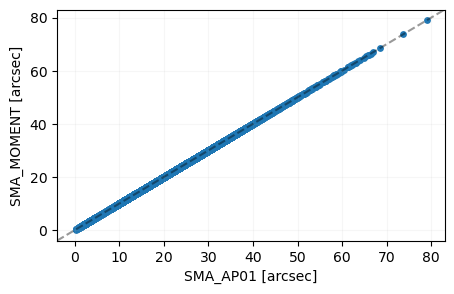

In [23]:
sma_ap1 = ellipse_tab['SMA_AP01']
sma_moment = ellipse_tab['SMA_MOMENT']

plt.figure(figsize=(5,3))
plt.scatter(sma_ap1, sma_moment,s=15)
plt.axline([0,0], slope=1, ls='--', color='black', alpha=0.4)
plt.xlabel('SMA_AP01 [arcsec]')
plt.ylabel('SMA_MOMENT [arcsec]')
plt.grid(alpha=0.1)
plt.show()

VAR check is complete. No penalty.

### QA Seven
#### MTOT vs. FLUX_AP04 fluxes (2x SMA_MOMENT)
 - (un-comment certain lines to color-code by $\chi^2$ of wavelength band's COG)

In [24]:
bands=['FUV','NUV','G','R','I','Z','W1','W2','W3','W4']   #uppercase GRIZ for FLUX_AP04_ and COG_MTOT_

ap04s = [f'FLUX_AP04_{band}' for band in bands]
mtots = [f'COG_MTOT_{band}' for band in bands]

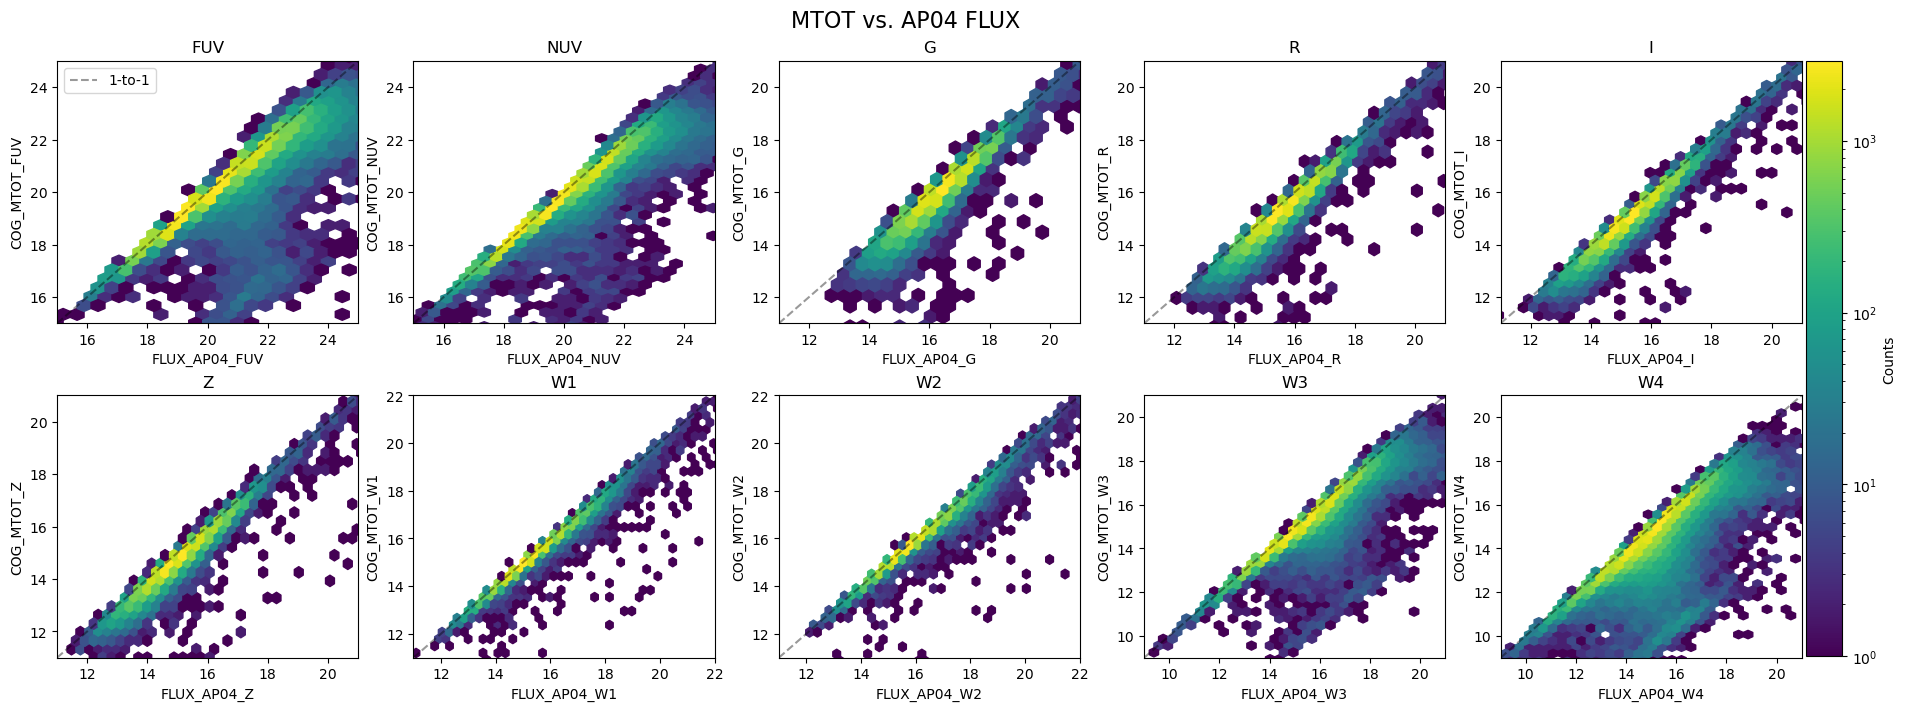

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 7), constrained_layout=True)

axes_flat = axes.ravel()

for i, ax in enumerate(axes_flat, start=1):
    ap04 = ap04s[i-1]
    mtot = mtots[i-1]
    
    err_flag = (ellipse_tab[mtot]!=0)
    
    ap04_mag = 22.5 - 2.5*np.log10(ellipse_tab[ap04])
    mtot_mag = ellipse_tab[mtot]
    
    #chi_red = ellipse_tab[f'COG_CHI2_{band}']/ellipse_tab[f'COG_NDOF_{band}']
    
    ax.set_title(bands[i-1])
    ax.set_xlabel(ap04)
    ax.set_ylabel(mtot)
    
    #im=ax.scatter(ap04_mag[err_flag], mtot_mag[err_flag],
    #          c=chi_red[err_flag], vmin=0.5, vmax=20)
    
    im=ax.hexbin(ap04_mag[err_flag], mtot_mag[err_flag],
        gridsize=50, mincnt=1,
        reduce_C_function=np.median,
        bins='log')
    
    
    ax.axline([0,0],slope=1,color='black',alpha=0.4,ls='--',label='1-to-1')
    
    #ax.set_xlim(np.min(ap04_mag[err_flag&(~np.isnan(ap04_mag))])-0.5, 
    #            np.max(ap04_mag[err_flag&(~np.isnan(ap04_mag))])+0.5)
    
    #ax.set_ylim(np.min(mtot_mag[err_flag&(~np.isnan(mtot_mag))])-0.5, 
    #            np.max(mtot_mag[err_flag&(~np.isnan(mtot_mag))])+0.5)
    
    if i<=2:
        ax.set_xlim(15,25)
        ax.set_ylim(15,25)
    
    elif i in [3,4,5,6]:
        ax.set_xlim(11,21)
        ax.set_ylim(11,21)
    
    elif i in [7,8]:
        ax.set_xlim(11,22)
        ax.set_ylim(11,22)
    
    elif i in [9,10]:
        ax.set_xlim(9,21)
        ax.set_ylim(9,21)
    
    else:
        ax.set_xlim(10,22)
        ax.set_ylim(10,22)
    
    if i==1:
        ax.legend(loc='upper left')

#relative x coord, relative y coord, relative thickness/width, relative length
#cbar_ax = fig.add_axes([1, 0.07, 0.02, 0.85]) 
#cbar=fig.colorbar(im, cax=cbar_ax, label=r'$\chi^2_{red}$ of COG')

cbar_ax = fig.add_axes([1, 0.07, 0.02, 0.85]) 
cbar=fig.colorbar(im, cax=cbar_ax, label=r'Counts')


fig.suptitle(r'MTOT vs. AP04 FLUX',fontsize=16)

plt.show()

### QA Eight
#### Colors with MTOT vs. colors with all AP apertures
- Want to check whether aperture choice biases color
- NOTE: convert g-r color to magnitudes using [g-r] = -2.5*log$_{10}\Big(\frac{flux_g}{flux_r}\Big)$
     - calculating the fraction directly eliminates the need for zeropoints. :-)

In [26]:
#g-r (MTOT) vs. g-r (AP), and r-z (MTOT) vs. r-z (AP)?
#one panel per aperture -- AP00, AP01, AP02, AP03, AP04

In [27]:
apertures = ['00', '01', '02', '03', '04']

mtot_g = ellipse_tab['COG_MTOT_G']
mtot_r = ellipse_tab['COG_MTOT_R']
mtot_z = ellipse_tab['COG_MTOT_Z']

err_flag = (mtot_g!=0) & (mtot_r!=0) & (mtot_z!=0)

mtot_g_r = mtot_g[err_flag] - mtot_r[err_flag]
mtot_r_z = mtot_r[err_flag] - mtot_z[err_flag]

sganames = ellipse_tab['SGAID'][err_flag]

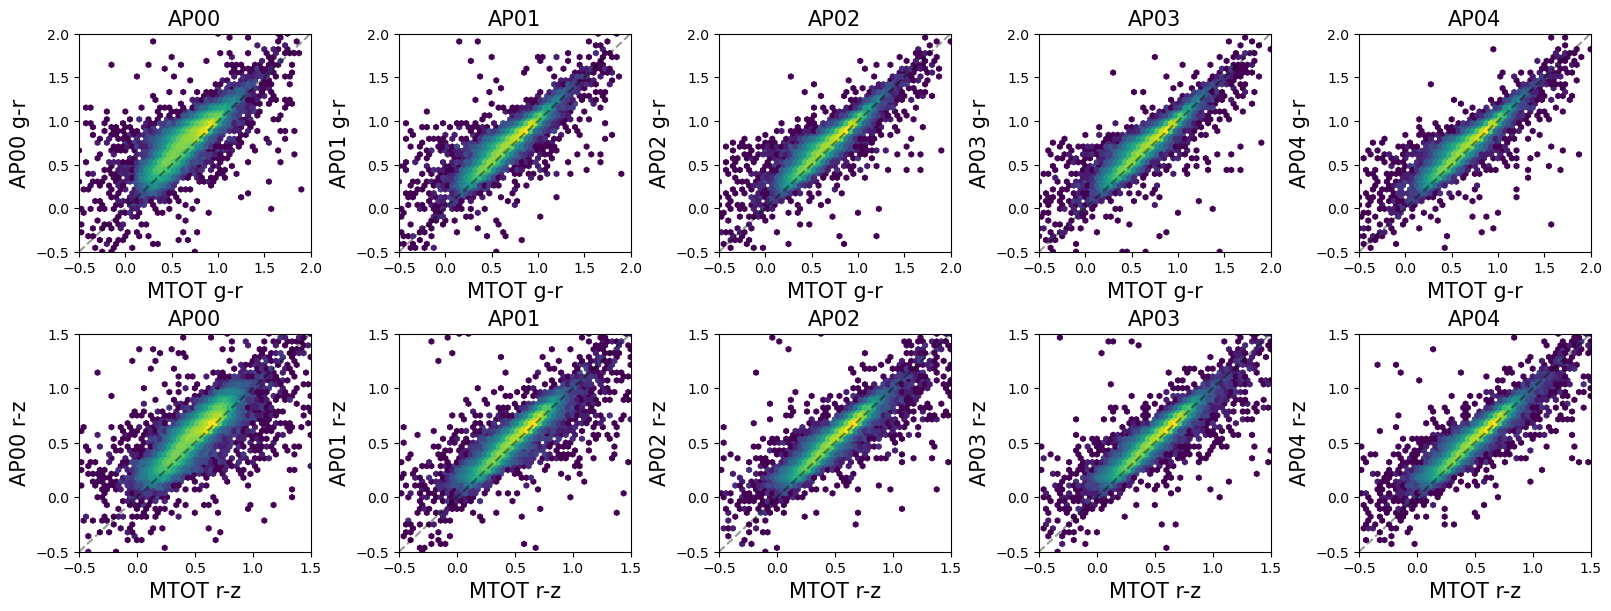

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 6), constrained_layout=True)
axes_flat = axes.ravel()

flagged_galaxies = []  #collect flagged galaxies to print later :)

for i, ax in enumerate(axes_flat, start=1):
    
    if i<6:
        ap_name=apertures[i-1]
    else:
        ap_name=apertures[i-6]
        
    ap_g = f'FLUX_AP{ap_name}_G'
    ap_r = f'FLUX_AP{ap_name}_R'
    ap_z = f'FLUX_AP{ap_name}_Z'
    
    g_r_ap = 2.5*-1*np.log10(ellipse_tab[ap_g]/ellipse_tab[ap_r])[err_flag]   #calculate color in magnitudes!
    r_z_ap = 2.5*-1*np.log10(ellipse_tab[ap_r]/ellipse_tab[ap_z])[err_flag]

    if i<6:
        ###############################
        ####         g-r           ####
        ###############################
        
        xmin=-0.5
        xmax=2
        
        ax.set_title(f'AP{ap_name}',fontsize=15)
        ax.set_ylabel(f'AP{ap_name} g-r', fontsize=15)
        ax.set_xlabel('MTOT g-r',fontsize=15)
        
        flag = (np.abs((mtot_g_r - g_r_ap)) > 1.0)
        
        im=ax.hexbin(mtot_g_r, g_r_ap,
        gridsize=50, mincnt=1,
        reduce_C_function=np.median,
        bins='log',extent=(xmin,xmax,xmin,xmax))
        
        ax.axline([0,0], slope=1, color='black', alpha=0.4, ls='--')
        
        sganames_band = sganames[flag]
        if np.sum(flag)>1:
            flagged_galaxies.append((f'AP{ap_name} g-r', sganames_band.data))

    else:
        ###############################
        ####         r-z           ####
        ###############################
        
        xmin=-0.5
        xmax=1.5
        
        ax.set_title(f'AP{ap_name}',fontsize=15)
        ax.set_ylabel(f'AP{ap_name} r-z',fontsize=15)
        ax.set_xlabel('MTOT r-z',fontsize=15)
        
        flag = (np.abs((mtot_r_z - r_z_ap)) > 1.0)
        
        im=ax.hexbin(mtot_r_z, r_z_ap,
        gridsize=50, mincnt=1,
        reduce_C_function=np.median,
        bins='log',extent=(xmin,xmax,xmin,xmax))
        
        ax.axline([0,0], slope=1, color='black', alpha=0.4, ls='--')
        
        sganames_band = sganames[flag]
        if np.sum(flag)>1:
            flagged_galaxies.append((f'AP{ap_name} r-z', sganames_band.data))
    
    
    
    ax.set_ylim(xmin, xmax)
    ax.set_xlim(xmin, xmax)
    
#fig.suptitle(r'FLUX_APxx vs. MTOT: g-r, r-z colors',fontsize=16)

###############################
####                       ####
###############################

plt.show()

#### Outliers

In [29]:
for label, names in flagged_galaxies:
    print(f'Galaxies with a separation > 1.0 for {label}:')
    print(names)
    print('')

Galaxies with a separation > 1.0 for AP00 g-r:

[   1158    2110    2125    2135    2502    2689    2690    3151    3229
    8956    9083    9313   11868   26145   26558   26813   37042   38685
   40278   41012   43339   43538   46277   48713   50808   51778   55723
   56288   57899   58483   63511   66156   73336   75953   78814   87375
   87904   88674  103364  120708  125758  130074  130513  139899  140755
  156333  158316  162065  163374  168526  173480  180999  186663  187981
  197272  214055  217075  217712  218091  223918  231750  236477  237437
  237730  240527  241005  241905  245347  246149  252431  253944  254253
  256263  257213  263560  265617  266532  269246  275412  295247  300134
  300277  305216  306098  308336  310056  314165  327631  329874  352466
  353227  354075  356574  363025  386981  387965  390163  395338  396819
  399832  406992  407419  407955  408383  410742  413158  413342  420124
  429237  431114  439844  450453  456771  462097  462254  464659  482488
  502356  618337  889911  925021  996981 1278555 1282932 1335228 2391273
 2429826 2433954 3136067 3136138 3138007 3138039 3138112 3138238 3138700
 3138828 3138943 3139411 3139420 3139524 3139771 3139803 3139945 3140049
 3140105 3140208 3140839 3140945 3140979 3141116 3141560 3141784 3141883
 3142544 3143521 3143798 3144836 3145325 3145414 3146299 3146484 3146498
 3146737 3147126 3147134 3147159 3148158 3148633 3148660 3150098 3150133
 3150867 3150888 3153062 3153469 3154884 3156889 3158831 3162126 3162587
 3165690 3167128 3168229 3169435 3170344 3170775 3173144 3174519 3177701
 3177768 3177844 3177990 3178014 3178564 3178723 3189235 3190208 3191670
 3194150 3196666 3198046 3200921 3201803 3205283 3205961 3206271 3206352
 3251135 3254636 3342629 3486259 3503784 3513862 3610909 3614026 3614476
 3614832 3617128 3619456 3635298 3660553 3660593 3662204 3664573 3689965
 3698676 3760841 3774832 3812973 3866621 3869946 3893850 3923334 4101540
 4101746 4129737 4129750 4130038 4130170 4130191 4130369 4130801 4131027
 4131246 4132168 4136443 4142218 4162931 4163099 4164802 4165702 4170240
 4196269 4196733 4196947 4205644 4292663 4369544 4693367 4694958 4703049
 4711087 4715263 4716404 4719253 4720325 4724919 4729095 4729467 4732764
 4736849 4740513 4741771 4742012 4742459 4743790 4744302 4751590 4753331
 4766538 4766995 4781436 4791773 4802102 4802328 4811216 4812197 4824631
 4824831 4839338 4841207 4843765 4852948 4861117 4861443 4862585 4881100
 4894535 4899849 4902808 4903651 4904831 4908163 4922903 4926652 4927669
 4928902 4946104 4951236 4954423 4960947 4962967 4972213 4976749 4993801
 4994989 5000445 5001741 5010456 5023991 5029620 5032140 5036904 5042472
 5046315 5047249 5052450 5056641]

Galaxies with a separation > 1.0 for AP01 g-r:

[   2135    2689    2690    8956    9083    9313   11868   38685   40278
   41012   43339   46277   48713   50808   55723   56288   57899   58483
   75953   87375   87904   88674  103364  109586  120708  126742  130074
  139899  153168  156333  162065  163374  180999  186663  187981  197272
  208323  214055  217075  218091  236477  241005  245347  254253  257213
  266532  271410  271747  275412  289427  295247  300134  306308  308336
  310056  312575  321326  329874  353227  354075  363025  381072  386981
  387965  395338  396819  407419  407955  408383  410742  439844  455517
  456771  462254  464659  472486  502356  889911  925021  996981 1278555
 1282932 2429826 2433954 3112690 3138039 3138112 3138238 3138700 3139420
 3139524 3139980 3140105 3141883 3142544 3143521 3144836 3146143 3146484
 3146498 3147126 3147134 3150098 3150867 3150888 3153062 3153469 3168229
 3171356 3177768 3177844 3190208 3196666 3205961 3206076 3251135 3254636
 3610909 3614112 3614476 3662204 3664573 3698676 3760841 3774832 4101540
 4101746 4129750 4130170 4131027 4131246 4132168 4164802 4165702 4196269
 4196947 4205644 4292663 4693367 4694958 4703049 4715263 4716404 4732764
 4736849 4740513 4741771 4742012 4742459 4744302 4766995 4781436 4791773
 4802102 4802328 4811216 4812197 4824831 4841207 4852948 4861117 4861443
 4862585 4881100 4894535 4899849 4903651 4908163 4922903 4928902 4930200
 4946104 4954423 4960947 4962967 4972213 4976749 4993801 4994989 5000445
 5001741 5023991 5042472 5046315 5056641]

Galaxies with a separation > 1.0 for AP02 g-r:

[   2135    2689    2690    8956    9083    9099    9313   11868   38685
   40278   43339   46277   48713   50808   55723   56288   57899   58483
   75953   87375   87904   88462   88674  103364  120708  130074  139899
  156333  162065  163374  180999  186663  187981  197272  214055  217075
  218091  236477  240525  241005  245347  254253  257213  263560  265617
  271410  271747  275412  289427  295247  300134  306308  321326  327631
  329874  353227  354075  363025  386981  395338  396819  399276  399832
  406992  407419  408383  410742  414050  439844  455517  456771  462254
  464659  472486  502356  889911  925021  996981 1278555 1282932 2391273
 2429826 2433954 3112690 3138112 3138238 3138943 3139420 3139524 3139980
 3140105 3141883 3146143 3147126 3147134 3153062 3153469 3168229 3171356
 3177699 3177768 3177844 3251135 3662204 3664573 3774832 4101540 4101746
 4129750 4130170 4131027 4132168 4164802 4165702 4196269 4196947 4198576
 4502659 4694958 4703049 4732764 4736849 4741771 4742459 4744302 4766995
 4781436 4802102 4802328 4811216 4812197 4824831 4841207 4852948 4861117
 4861443 4862585 4876472 4894535 4899849 4903651 4908163 4922903 4928902
 4960947 4962967 4972213 4976749 4994989 5000445 5001741 5042472 5046315
 5056641]

Galaxies with a separation > 1.0 for AP03 g-r:

[   2125    2135    2689    2690    8585    9083    9099   11868   38685
   43339   46277   48713   50808   55723   56288   57899   58225   58483
   60945   75953   87375   87904  103364  120708  130074  133799  139899
  156333  162065  163374  165657  180999  183821  185138  186663  187981
  214055  217075  218091  236477  241005  245347  254253  257213  263560
  271410  271747  289427  295247  305216  312575  327631  329874  353227
  354075  363025  386981  395338  396819  399832  407419  408383  410742
  414050  439844  450728  455517  456771  462254  464659  472486  483164
  502356  512476  925021  996981 1085502 1278555 1282932 1315185 2391273
 2429826 2433954 3112690 3138007 3138943 3139420 3139980 3140105 3146143
 3146544 3150867 3153469 3168229 3171356 3177844 3251135 3253349 3617128
 4101540 4131027 4132168 4164802 4165702 4196269 4198576 4694958 4703049
 4732764 4736849 4741771 4742459 4744302 4766995 4781436 4802102 4802328
 4811216 4812197 4841207 4852948 4862585 4876472 4894535 4899849 4903651
 4908163 4922903 4928902 4960947 4962967 4972213 4976749 4994989 5001741
 5042472 5046315 5056641]

Galaxies with a separation > 1.0 for AP04 g-r:

[   2125    2689    2690    9083    9099   11868   38685   40278   43339
   46277   48713   50808   55723   56288   58483   75953   80346   87375
   87904  103364  120708  130074  139899  156333  162065  163374  180464
  180999  186663  187981  217075  218091  236477  241005  245347  257213
  271410  289427  295247  312575  314165  353227  354075  363025  386981
  387965  395338  397674  399276  399832  408383  410742  414050  431114
  439844  456771  462254  464659  472486  502356  925021  996981 1085502
 1278555 1282932 1282983 1315185 2391273 2429826 2433954 3112690 3138007
 3138943 3139980 3146143 3146544 3147134 3150867 3153469 3168229 3171356
 3177701 3251135 3253349 3617128 4131027 4132168 4164802 4196269 4196947
 4198576 4502659 4694958 4703049 4736849 4741771 4742459 4744302 4766995
 4781436 4802102 4802328 4811216 4812197 4841207 4852948 4876472 4894535
 4899849 4903651 4908163 4922903 4928902 4960947 4962967 4972213 4976749
 4994989 5001741 5042472 5046315 5056641]

Galaxies with a separation > 1.0 for AP00 r-z:

[   1041    1158    1298    1561    1994    2110    2125    2135    2392
    2502    2600    2633    2689    2742    3057    3151    8585    8956
    9152   12038   14747   26479   26558   26813   32146   36362   40278
   41335   41361   41362   41379   43966   45669   48713   49499   51778
   52381   55723   56288   57458   59451   63511   65030   72133   74782
   75953   80346   83555   86427   87375   87904   88674  119822  121241
  123394  124773  125695  126375  126742  126744  129944  130074  139899
  140755  142549  146468  149939  154133  158316  164632  164656  165535
  173480  173626  175425  176488  182953  185719  186663  186949  187365
  187981  197272  200644  205880  208323  209545  213752  217712  221882
  223918  228098  228886  229599  231750  233090  236477  237437  240527
  242556  245347  252185  252431  253944  256263  271747  277526  295247
  300277  305216  306098  314165  333441  341351  349916  353227  354075
  356574  361711  363025  367405  368250  371844  375537  375709  386981
  395338  396819  401987  407419  407955  408383  409063  410742  410919
  411778  412901  413158  413296  413342  413857  414005  414963  420124
  420900  431114  445718  450454  450728  462254  464659  472486  618337
  741484  916329  925021  942883  996981 1085502 1278555 1281588 1662170
 1780988 2391273 3135800 3135818 3136138 3136229 3136547 3138112 3138238
 3138700 3138943 3139110 3139117 3139592 3139642 3139771 3139803 3139945
 3140088 3140105 3140208 3140221 3140227 3140839 3140979 3141033 3141116
 3141422 3141560 3141643 3141659 3141784 3142046 3142544 3143441 3143470
 3143521 3144288 3144394 3144531 3144836 3144954 3145262 3145334 3145335
 3145502 3146001 3146143 3146260 3146264 3146283 3146392 3146484 3146498
 3146684 3146695 3146839 3147223 3147330 3147495 3147743 3148158 3148633
 3148660 3148667 3150790 3152953 3153062 3156889 3158831 3159320 3162126
 3168229 3170775 3173144 3176740 3176765 3177701 3177768 3177798 3177844
 3177950 3177990 3178014 3178564 3178723 3196666 3198046 3200866 3200870
 3200921 3201803 3205088 3205118 3206076 3206271 3206352 3251048 3251135
 3251455 3254636 3299351 3341783 3342629 3370273 3491206 3497537 3513862
 3517076 3610909 3614011 3614112 3614832 3615015 3619456 3636240 3637444
 3660553 3660593 3664573 3689965 3691231 3712540 3774832 3845859 3869946
 3893850 4101391 4101494 4101540 4101746 4103526 4104820 4129737 4130053
 4130170 4130369 4130524 4130801 4131027 4131246 4132168 4133507 4136443
 4136727 4142218 4162987 4163099 4164153 4165702 4170240 4177385 4195925
 4195947 4196142 4196733 4196947 4198234 4199349 4235268 4235366 4292663
 4368825 4369544 4687440 4696621 4709580 4715513 4716469 4736849 4742012
 4743696 4743790 4744560 4748365 4751590 4760385 4763686 4767552 4768535
 4768653 4771319 4781436 4783984 4785031 4785959 4786702 4806801 4811216
 4811999 4812197 4819955 4822306 4824831 4835280 4837245 4839338 4852948
 4857719 4860533 4873467 4888928 4898256 4900927 4902808 4903651 4911312
 4916318 4923264 4928391 4929139 4940749 4946104 4957150 4960952 4976749
 4981036 4987051 4994447 4994989 4998737 5001741 5020051 5022712 5027148
 5027213 5044623 5044862 5046315 5054087]

Galaxies with a separation > 1.0 for AP01 r-z:

[    945    1041    1158    1994    2135    2600    2633    2742    3057
    3229    8956    9313   11985   12038   36362   41335   41361   41362
   48713   52381   55723   56288   57458   59451   65030   74782   75953
   83940   87904   88674   95828  109586  125695  126375  126742  126744
  127199  129944  130074  139899  154133  164632  164656  165657  176790
  186663  187981  197272  200644  205880  209545  214055  217712  221882
  228886  229599  236477  237437  242556  245347  252185  253944  254244
  271046  271410  277526  289427  295247  306098  306308  312575  314165
  315830  321326  341351  353227  354075  361711  367405  368250  371844
  381072  387965  395338  396819  399534  401987  406992  407955  409063
  410742  413158  413296  413342  413857  420124  450454  450728  462254
  472486  618337  916329  925021  942883  996981 1278555 1281588 1282983
 1315185 1662170 1780988 3112690 3135800 3136067 3138112 3138238 3138700
 3139117 3139592 3140105 3140227 3140945 3141659 3142544 3143521 3144288
 3144531 3144836 3145335 3145502 3146001 3146143 3146392 3146484 3146498
 3146684 3146839 3147330 3147495 3148667 3152459 3152953 3153062 3153469
 3176740 3176765 3177768 3177798 3177844 3177950 3196666 3206076 3251135
 3251455 3254636 3497537 3513862 3517076 3610909 3614112 3615015 3664573
 3774832 4101540 4101746 4103526 4130170 4131027 4131246 4133507 4164153
 4165702 4177385 4195925 4195947 4196008 4196947 4199349 4235268 4235366
 4502659 4687440 4696621 4709580 4715513 4732764 4736849 4742012 4743696
 4744560 4748365 4760385 4763686 4767552 4768535 4768653 4771319 4781436
 4786702 4806801 4811216 4812197 4819955 4824831 4835280 4837245 4839338
 4852948 4860533 4873467 4876472 4888928 4898256 4900927 4903651 4911312
 4916318 4923264 4946104 4957150 4960952 4976749 4981036 4987051 4994989
 4998737 5001741 5020051 5044862 5046315 5054961]

Galaxies with a separation > 1.0 for AP02 r-z:

[    945    1041    1158    1994    2125    2135    2600    2742    3229
    8585    8956    9313   12038   36362   41335   41361   41362   48713
   52381   55723   56288   57458   58225   58483   59451   65030   75953
   80346   83940   87904   88462   88674   88956   95828  108452  109586
  125695  126375  126742  126744  129944  130074  133799  139899  154133
  156333  164632  164656  176790  186663  187981  188869  197272  200644
  205880  209545  214055  217712  221882  228886  229599  236477  237437
  240525  242556  245347  252185  271046  271410  277526  289427  295247
  306098  312575  314165  315830  329874  341351  353227  354075  367405
  371844  386981  390163  395338  396819  401987  406992  409063  410742
  413296  414963  420124  450454  450728  455517  462254  472486  618337
  916329  925021  942883  996981 1085502 1278555 1281588 1315185 1780988
 2391273 3112690 3112703 3135800 3138112 3138238 3139592 3140105 3141659
 3145334 3145335 3145502 3146143 3146684 3146839 3147101 3147330 3147495
 3152459 3153062 3176765 3177768 3177798 3177844 3251135 3251455 3253349
 3497537 3664573 3774832 4101540 4101746 4103526 4129750 4130170 4131027
 4165702 4196008 4196142 4196947 4235268 4235366 4502659 4687440 4715513
 4732764 4736849 4743696 4744560 4748365 4760385 4763686 4767552 4768535
 4771319 4781436 4806801 4811216 4812197 4819955 4824831 4837245 4839338
 4852948 4860533 4873467 4876472 4888928 4898256 4903651 4911312 4957150
 4960952 4976749 4981036 4987051 4994989 4998737 5001741 5020051 5046315
 5054961]

Galaxies with a separation > 1.0 for AP03 r-z:

[    945    1158    1994    2125    2135    2392    2600    2742    3229
    8585    9313   12038   36362   38685   41335   41361   41362   43966
   48713   48976   52381   55723   56288   57458   58483   59451   65030
   75953   83940   87904   88956   95828  108452  109586  125695  126375
  126744  129944  130074  133799  139899  154133  156333  164632  164656
  176790  180464  183821  186663  187981  188869  200644  205880  209545
  214055  217712  221882  228886  229599  236477  237437  240525  242556
  245347  252185  271046  271410  277526  289427  295247  306098  312575
  314165  329874  353227  354075  367405  371844  386981  390163  395338
  396819  399832  401987  406992  409063  410742  413296  420124  431114
  450454  450728  462254  472486  483164  512476  925021  942883  996981
 1085502 1278555 1281588 1315185 1780988 2391273 3112703 3139592 3139980
 3140105 3141659 3145334 3145335 3145502 3146143 3146684 3146839 3147101
 3147495 3152459 3176765 3177699 3177798 3177844 3251135 3251455 3253349
 3497537 3689965 4101540 4103526 4129750 4131027 4165702 4196008 4196142
 4235268 4235366 4502659 4687440 4732764 4736849 4743696 4748365 4763686
 4767552 4768535 4771319 4781436 4806801 4811216 4812197 4819955 4824831
 4837245 4839338 4852948 4860533 4873467 4876472 4888928 4898256 4903651
 4911312 4957150 4960952 4976749 4981036 4987051 4994989 5001741 5020051
 5046315]

Galaxies with a separation > 1.0 for AP04 r-z:

[    945    1158    1994    2125    2392    2600    3229    9099    9313
   12038   36362   40278   41362   43966   48713   48976   52381   55723
   56288   57458   59451   65030   75953   83940   87904   95828  108452
  125695  126744  129944  139899  154133  156333  164656  176790  186663
  187981  200644  205880  209545  214055  217712  221882  228886  236477
  237437  242556  245347  252185  271046  277526  289427  295247  306098
  312575  314165  327631  353227  354075  367405  371844  386981  390163
  395338  396819  399832  401987  409063  410742  413296  420124  462254
  472486  942883  996981 1085502 1278555 1281588 1315185 1780988 2391273
 3136229 3139592 3139980 3141643 3141659 3145334 3145335 3145502 3146143
 3146684 3147101 3152459 3177798 3251135 3251455 3253349 4101540 4103526
 4131027 4196008 4196142 4196947 4235268 4235366 4502659 4736849 4743696
 4748365 4763686 4767552 4768535 4771319 4781436 4806801 4811216 4812197
 4819955 4824831 4837245 4839338 4852948 4860533 4873467 4876472 4888928
 4898256 4903651 4911312 4957150 4960952 4976749 4981036 4987051 4994989
 5001741 5020051 5046315]

### QA Nine
#### Plot SMA_MOMENT vs.  R[isophote]_R
 - how does SMA_MOMENT correlate with isophotal radii for r-band (R)?
 - R24, R25, R26

In [30]:
%run isophote_cornerplot.py

Use: generate_cornerplot(data_table=None, band='R')

Enter your own astropy.table object for data_table; defaults to my (the author's) path.

Band can be G, R, I, Z

<Figure size 640x480 with 0 Axes>

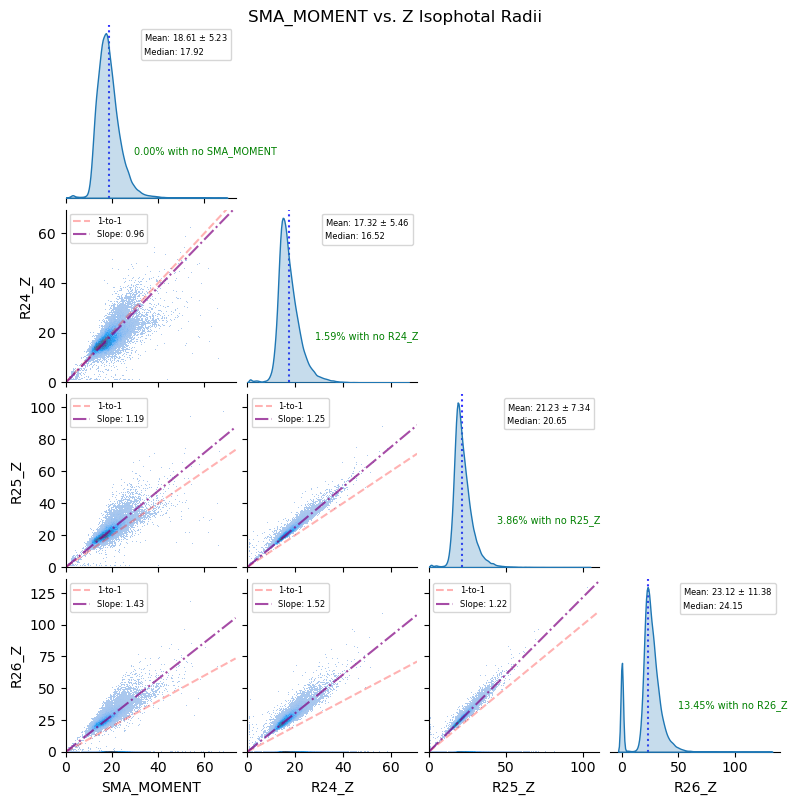

In [31]:
generate_cornerplot(data_table=ellipse_tab, band='Z')

### QA Ten
#### Plot R26_R [SGA2025] vs.  R26_R [SGA2020]
 - Want to ensure the adopted diameters for DR11 match the SGA-2020 D26 values in the mean
     - that is, check that the radii are not systematically offset

In [32]:
#isolate RA, DEC, R26_R [2020], R26_R [2025]
#sga2020 is defined under the "Load Modules..." section
sga2020_r26 = Table({'RA': sga2020['ra'],
                     'DEC': sga2020['dec'],
                     'R26_R': sga2020['sma_sb26']})

sga2025_r26 = Table({'RA': ellipse_tab['RA'],
                     'DEC': ellipse_tab['DEC'],
                     'R26_R': ellipse_tab['R26_R']})

In [33]:
#create SkyCoord objects for each catalog...
coords2020 = SkyCoord(ra=sga2020_r26['RA']*u.deg, dec=sga2020_r26['DEC']*u.deg, frame='icrs')
coords2025 = SkyCoord(ra=sga2025_r26['RA']*u.deg, dec=sga2025_r26['DEC']*u.deg, frame='icrs')

#match coordinates in sga2025 to the closest in sga2020
idx, d2d, d3d = coords2025.match_to_catalog_sky(coords2020)

#add matched information to sga2025
sga2025_r26['sga2020_R26_R'] = sga2020_r26['R26_R'][idx]
sga2025_r26['Separation'] = d2d

In [34]:
#I'll keep matches with a separation of 3.6", in honor of the resolution of SGA2025 names
flag=(sga2025_r26['Separation']<=3.6/3600.)

#also remove instances where there is no data -- R26_R for SGA2020 or SGA2025 = 0
zero_flag = (sga2025_r26['R26_R']>0) & (sga2025_r26['sga2020_R26_R']>0)

In [35]:
r26_2020 = sga2025_r26['sga2020_R26_R'][flag&zero_flag]
r26_2025 = sga2025_r26['R26_R'][flag&zero_flag]

In [36]:
#difference
r26_ratio = r26_2025 / r26_2020
mean_ratio = np.mean(r26_ratio)
median_ratio = np.median(r26_ratio)
stdev_ratio = np.std(r26_ratio)

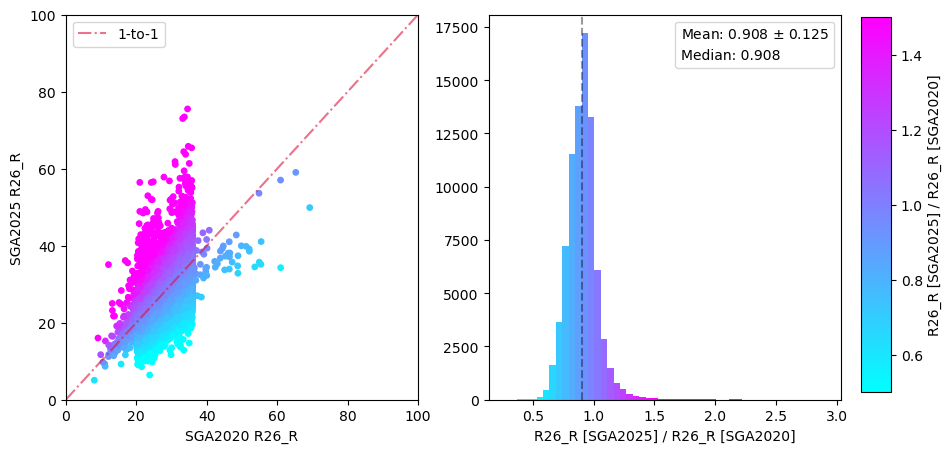

In [37]:
#plot for diagnostic purposes. which SG coordinate best correlates with redshift?
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im1 = axs[0].scatter(r26_2020, r26_2025, s=15, c=r26_ratio,
                    cmap='cool', vmin=0.5, vmax=1.5)#, edgecolor='lightgray')
axs[0].axline([0,0],slope=1,color='crimson',ls='-.',alpha=0.6,label='1-to-1')
axs[0].set_xlabel('SGA2020 R26_R')
axs[0].set_ylabel('SGA2025 R26_R')
axs[0].set_xlim(0,100)
axs[0].set_ylim(0,100)
axs[0].legend()

axs[1].axvline(mean_ratio,color='black',ls='--',alpha=0.4,
                   label=f'Mean: {mean_ratio:.3f} $\pm$ {stdev_ratio:.3f}')

axs[1].axvline(median_ratio,alpha=0,label=f'Median: {median_ratio:.3f}')

axs[1].set_xlabel(f'R26_R [SGA2025] / R26_R [SGA2020]')
axs[1].legend(handlelength=0, handletextpad=0)   #the args remove the marker from the legend


###
#from matplotlib histogram documentation
###
N, bins, patches = axs[1].hist(r26_ratio, bins=50)

#normalize to min/max of data range
norm = colors.Normalize(vmin=0.5, vmax=1.5)
cmap = plt.cm.cool

#get bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

#loop over bins, not raw data
for center, patch in zip(bin_centers, patches):
    patch.set_facecolor(cmap(norm(center)))
    
cbar_ax = fig.add_axes([0.92, 0.125, 0.03, 0.75]) 
cbar=fig.colorbar(im1, cax=cbar_ax)
cbar.set_label(f'R26_R [SGA2025] / R26_R [SGA2020]')
 
    
plt.show()

#### Outliers

In [38]:
for i in range(len(r26_diff)):
    if (np.abs(r26_diff[i])>10):
        sganame = ellipse_tab['SGAID'][flag&zero_flag][i]
        print(f'Galaxy with R26_R difference > 10": {sganame}') 
        print(f'Separation: {r26_diff[i]:.3f}')
        print()

NameError: name 'r26_diff' is not defined